# Problem Statement

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1] If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2] If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties**: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases**: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved**: The Company has approved loan Application

**Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

**Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer**:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


###### Import Libraries

In [1]:
# import iportant libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

###### Data Importing

In [2]:
#import application data
df = pd.read_csv("application_data.csv")

## Understanding the data

In [3]:
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.dtypes.head(50)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [7]:
df.dtypes.tail(50)

APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
FLOORSMIN_MEDI                  float64
LANDAREA_MEDI                   float64
LIVINGAPARTMENTS_MEDI           float64
LIVINGAREA_MEDI                 float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAREA_MEDI              float64
FONDKAPREMONT_MODE               object
HOUSETYPE_MODE                   object
TOTALAREA_MODE                  float64
WALLSMATERIAL_MODE               object
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
FLAG_DOCUMENT_2                   int64


In [8]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


The dataset "application.csv" is a large dataset with 307511 rows and 122 columns, with majority of datatypes as int(especially for flag values, target, discrete variables such as number of children), float, some are object type (mostly catagorical or descriptive)

To get further idea, checking for missing data and quality of data

## Data Processing Cleaning

##### Checking for Missing value

In [10]:
# null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
# percentage of null values
df.isnull().sum()*100/df.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [12]:
# Checking for more than 50 % missing values
list1=list(df.columns[(df.isnull().sum()*100/df.shape[0])>50])
len(list1)

41

In [13]:
list1

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

Since the missing values are too high i.e. above 50%, these data columns can be removed. and it will be difficult to derive any useful analysis from those

##### Dropping the columns with >50% missing data

In [14]:
df.drop(columns=list1, axis=1,inplace=True)

In [15]:
df.shape

(307511, 81)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

##### Dropping columns which are not directly related to our Target variable

Columns such as 'who accompanied the applicant','relative population of region','phone number of work place','weekday of application,'hour of application'etc can be dropped. 

In [17]:
list2=['NAME_TYPE_SUITE','DAYS_ID_PUBLISH','REGION_POPULATION_RELATIVE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
df.drop(columns=list2,axis=1,inplace=True)

In [19]:
df.shape

(307511, 53)

##### Checking correlation between target variable and other variables which may have some effect

'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',' DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

Checking correlation to confirm if any relationship exists

In [20]:
df[['TARGET','DAYS_REGISTRATION']].corr()

,TARGET,DAYS_REGISTRATION
TARGET,1.000000,0.041975
DAYS_REGISTRATION,0.041975,1.000000


In [21]:
df[['TARGET','REGION_RATING_CLIENT_W_CITY']].corr()

,TARGET,REGION_RATING_CLIENT_W_CITY
TARGET,1.000000,0.060893
REGION_RATING_CLIENT_W_CITY,0.060893,1.000000


The Correlation values are quite low, this means there is no linear relationship with these variables. Dropping these columns for further nalysis

In [22]:
list3=['DAYS_REGISTRATION','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [23]:
df.drop(columns=list3,axis=1, inplace=True)
df.shape

(307511, 47)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

##### Dropping Documents Columns

In [25]:
df.groupby('TARGET')['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'].sum()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
TARGET,,,,,,,,,,,,,,,,,,,,
0,9,199028,25,4276,25571,56,23188,1124,7,1128,2,1054,873,361,2903,80,2358,171,143,89
1,4,19312,0,372,1507,3,1836,74,0,75,0,30,30,11,150,2,142,12,13,14


A loan application requires mandatory documents without which the loan cannot be approved. Considering the fact that those documents are compulsory and the list of documents given the dataset donot have any particular description.

Also the table shows mostly these documents are missing, these can be considered as additional columns. These data columns are removed as no logical conclusions can be drawn.

In [26]:
list_drop=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [27]:
df.drop(columns=list_drop,axis=1,inplace=True)
df.shape

(307511, 27)

##### handling CODE_GENDER

In [28]:
df.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [29]:
df.groupby(["TARGET"])['CODE_GENDER'].value_counts(normalize=True)

TARGET  CODE_GENDER
0       F              0.666032
        M              0.333954
        XNA            0.000014
1       F              0.570796
        M              0.429204
Name: CODE_GENDER, dtype: float64

Since our analysis is for Credit, for that the income and valid documents is majorly important. Also the sample for both male & female has a big difference. Considering Gender is not an important parameter and To ensure unbaised decision based on Gender, we can drop the column.

In [30]:
df.drop('CODE_GENDER',axis=1,inplace=True)

In [31]:
df.shape

(307511, 26)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

Since the number of unique ID's are same as number of rows, no duplicate entries are present

### Checking for duplicate value

In [33]:
# Checking if duplicate entries are present, (using ID column)
len(df.SK_ID_CURR.unique())

307511

### Dealing with missing values and Datatypes

In [34]:
# Checking Missing values
df.isnull().sum()*100/df.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
FLAG_MOBIL                     0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
ORGANIZATION_TYPE              0.000000


###### handling missing values in "OCCUPATION_TYPE" column

In [35]:
# OCCUPATION_TYPE
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

Since the missing values are high, creating a separate group "Unknown"

In [36]:
# Filling the unavailable occupation type with "Unknown"
df['OCCUPATION_TYPE'].fillna(value='Unknown',axis=None,inplace=True)

In [37]:
# checking 
df.OCCUPATION_TYPE.value_counts(normalize=True)

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

###### handling missing values in "AMT_ANNUITY" column

In [38]:
# AMT_ANNUITY Column
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

There is a large gap in the 75th quantile and maximum value, it shows that taking mean may not be a correct approach for filling missing values

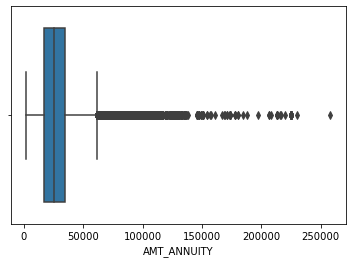

In [39]:
sns.boxplot(df.AMT_ANNUITY)
plt.show()

Filling the missing values with Median, as there are many outliers and therefore a mean may be biased.

In [40]:
median_value=df.AMT_ANNUITY.median()
median_value

24903.0

In [41]:
df['AMT_ANNUITY'].fillna(value=median_value,axis=None, inplace=True)

In [42]:
df['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

##### handling missing values in "AMT_GOODS_PRICE" column

In [43]:
# AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

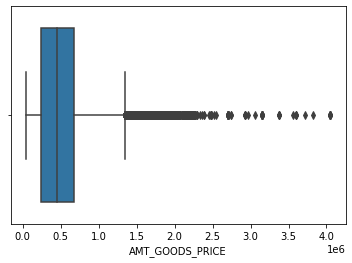

In [44]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

There ia quite a difference amongst the max values and IQR. Filling the missing values with Median, as there are many outliers and therefore a mean may be biased.

In [45]:
median2=df.AMT_GOODS_PRICE.median()
median2

450000.0

In [46]:
df['AMT_GOODS_PRICE'].fillna(value=median2,axis=None, inplace=True)

In [47]:
df['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#### CNT_FAM_MEMBERS

In [48]:
df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

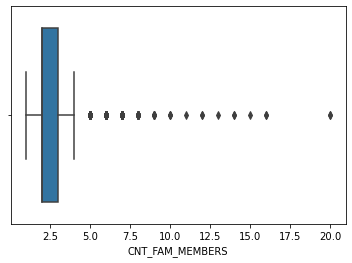

In [49]:
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

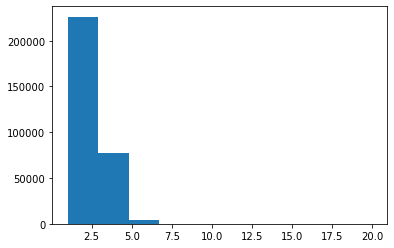

In [50]:
plt.hist(df.CNT_FAM_MEMBERS)
plt.show()

In [51]:
df.CNT_FAM_MEMBERS.quantile([0.25,0.5,0.75,0.8,0.9,0.99])

0.25    2.0
0.50    2.0
0.75    3.0
0.80    3.0
0.90    3.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [52]:
df[df.CNT_FAM_MEMBERS>5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
1133,101324,0,Cash loans,N,Y,4,121500.0,1125000.0,32895.0,1125000.0,...,1,1,0,Core staff,6.0,2,0,0,Kindergarten,-1399.0
1721,102013,0,Cash loans,N,Y,4,112500.0,592560.0,40086.0,450000.0,...,1,1,0,Cleaning staff,6.0,3,0,0,School,-281.0
2348,102747,0,Cash loans,N,N,4,67500.0,148365.0,11893.5,135000.0,...,1,1,0,Core staff,6.0,2,0,0,Transport: type 2,-2336.0
2666,103113,1,Revolving loans,Y,N,4,45000.0,180000.0,9000.0,180000.0,...,1,1,0,Laborers,6.0,2,0,0,Agriculture,-1097.0
3079,103596,0,Cash loans,N,Y,7,85500.0,411813.0,17577.0,355500.0,...,1,1,0,Cleaning staff,9.0,2,0,0,Housing,-66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305112,453499,0,Cash loans,N,N,7,112500.0,143910.0,15399.0,135000.0,...,1,1,0,Laborers,8.0,3,0,0,Business Entity Type 3,-491.0
306244,454820,0,Cash loans,N,Y,4,63000.0,1018899.0,29920.5,850500.0,...,1,1,0,Unknown,6.0,2,0,0,Other,-397.0
306297,454877,1,Revolving loans,N,Y,4,90000.0,202500.0,10125.0,202500.0,...,1,1,0,Laborers,6.0,2,0,0,School,-204.0
306888,455557,0,Cash loans,N,Y,5,112500.0,896643.0,35689.5,724500.0,...,1,1,0,Unknown,7.0,2,0,0,XNA,-663.0


Using the median value to fill the missing value.

In [53]:
df.CNT_FAM_MEMBERS.fillna(value=df.CNT_FAM_MEMBERS.median(),axis=None,inplace=True)
df.CNT_FAM_MEMBERS=df.CNT_FAM_MEMBERS.astype("int64")

In [54]:
#checking
df.CNT_FAM_MEMBERS.isnull().sum()

0

##### handling missing values in "DAYS_LAST_PHONE_CHANGE"

In [55]:
# DAYS_LAST_PHONE_CHANGE
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

The Number of days cannot be neagtive, it may be an error while reporting. Correcting the data values.

In [56]:
df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x*(-1) if x< 0 else x)
df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [57]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
FLAG_MOBIL                    0
FLAG_CONT_MOBILE              0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
REG_REGION_NOT_LIVE_REGION    0
REG_CITY_NOT_LIVE_CITY        0
ORGANIZATION_TYPE             0
DAYS_LAST_PHONE_CHANGE        1
dtype: int64

#### CNT_FAM_MEMBERS

In [58]:
df.CNT_FAM_MEMBERS.value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

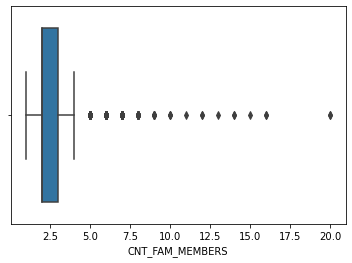

In [59]:
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

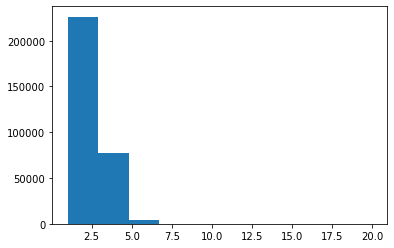

In [60]:
plt.hist(df.CNT_FAM_MEMBERS)
plt.show()

In [61]:
df.CNT_FAM_MEMBERS.quantile([0.25,0.5,0.75,0.8,0.9,0.99])

0.25    2.0
0.50    2.0
0.75    3.0
0.80    3.0
0.90    3.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [62]:
df[df.CNT_FAM_MEMBERS>5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
1133,101324,0,Cash loans,N,Y,4,121500.0,1125000.0,32895.0,1125000.0,...,1,1,0,Core staff,6,2,0,0,Kindergarten,1399.0
1721,102013,0,Cash loans,N,Y,4,112500.0,592560.0,40086.0,450000.0,...,1,1,0,Cleaning staff,6,3,0,0,School,281.0
2348,102747,0,Cash loans,N,N,4,67500.0,148365.0,11893.5,135000.0,...,1,1,0,Core staff,6,2,0,0,Transport: type 2,2336.0
2666,103113,1,Revolving loans,Y,N,4,45000.0,180000.0,9000.0,180000.0,...,1,1,0,Laborers,6,2,0,0,Agriculture,1097.0
3079,103596,0,Cash loans,N,Y,7,85500.0,411813.0,17577.0,355500.0,...,1,1,0,Cleaning staff,9,2,0,0,Housing,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305112,453499,0,Cash loans,N,N,7,112500.0,143910.0,15399.0,135000.0,...,1,1,0,Laborers,8,3,0,0,Business Entity Type 3,491.0
306244,454820,0,Cash loans,N,Y,4,63000.0,1018899.0,29920.5,850500.0,...,1,1,0,Unknown,6,2,0,0,Other,397.0
306297,454877,1,Revolving loans,N,Y,4,90000.0,202500.0,10125.0,202500.0,...,1,1,0,Laborers,6,2,0,0,School,204.0
306888,455557,0,Cash loans,N,Y,5,112500.0,896643.0,35689.5,724500.0,...,1,1,0,Unknown,7,2,0,0,XNA,663.0


Using the median value to fill the missing value.

In [63]:
df.CNT_FAM_MEMBERS.fillna(value=df.CNT_FAM_MEMBERS.median(),axis=None,inplace=True)

In [64]:
#checking
df.CNT_FAM_MEMBERS.isnull().sum()

0

###### Creating a column "MONTHS_LAST_PHONE_CHANGE" and dropping the column "DAYS_LAST_PHONE_CHANGE"

In [65]:
# Creating a column 'MONTHS_LAST_PHONE_CHANG' by Converting the "DAYS_LAST_PHONE_CHANGE" column into months
df['MONTHS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: float(x/365))

In [66]:
df['MONTHS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean          2.637969
std           2.265229
min           0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: MONTHS_LAST_PHONE_CHANGE, dtype: float64

In [67]:
df['MONTHS_LAST_PHONE_CHANGE'].value_counts(normalize=True)

0.000000     0.122507
0.002740     0.009144
0.005479     0.007538
0.008219     0.005733
0.010959     0.004179
               ...   
11.098630    0.000003
9.843836     0.000003
9.923288     0.000003
9.780822     0.000003
9.693151     0.000003
Name: MONTHS_LAST_PHONE_CHANGE, Length: 3773, dtype: float64

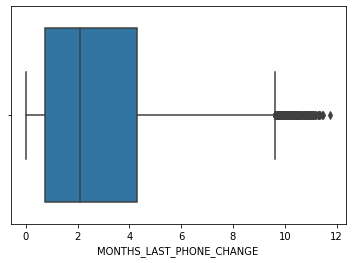

In [68]:
sns.boxplot(df.MONTHS_LAST_PHONE_CHANGE)
plt.show()

Considering Median value for Filling the missing fields as the distribution is skewed towards the left

In [69]:
var=df['MONTHS_LAST_PHONE_CHANGE'].median()

In [70]:
df['MONTHS_LAST_PHONE_CHANGE'].fillna(value=var, axis=None, inplace=True)

In [71]:
# checking
df['MONTHS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [72]:
## Changing the datatype to integer and rounding off to nearest integers
df['MONTHS_LAST_PHONE_CHANGE']=df['MONTHS_LAST_PHONE_CHANGE'].round().astype('int64')

In [73]:
# Dropping the column DAYS_LAST_PHONE_CHANGE
df.drop("DAYS_LAST_PHONE_CHANGE", axis=1, inplace= True)

In [74]:
df.shape

(307511, 26)

#### Handling the columns "DAYS_BIRTH" & "DAYS_EMPLOYED"

In [75]:
df.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [76]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Both the columns have negative values, while number of days cannot be negative. Therefore correcting the value and creating a new column "AGE" for Age in Years, rounded to nearest Integer. Another column "YEARS_EMPLOYED" rounded to 2 integers.

After creating columns, dropping off the columns "DAYS_EMPLOYED" , "DAYS_BIRTH"

##### DAYS_BIRTH

In [77]:
# Creating Age column removing negative sign
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(lambda x: x*(-1) if x< 0 else x)
df['AGE']=df['DAYS_BIRTH'].apply(lambda x: x/365 )
df['AGE'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

In [78]:
#Converting Age column to integers and rounding off to nearest integer
df['AGE']=df['AGE'].round().astype('int64')

In [79]:
df.AGE.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

#####  DAYS_EMPLOYED column

In [80]:
# Creating Curr_Emp column removing negative sign
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(lambda x: x*(-1) if x< 0 else x)
df['Curr_Emp']=df['DAYS_EMPLOYED'].apply(lambda x: x/365)
df['Curr_Emp'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: Curr_Emp, dtype: float64

In [81]:
df['Curr_Emp'].round(2)
df['Curr_Emp'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: Curr_Emp, dtype: float64

In [82]:
# Dropping "DAYS_EMPLOYED" & "DAYS_BIRTH"
df.drop(["DAYS_EMPLOYED","DAYS_BIRTH"],axis=1, inplace=True)
df.shape

(307511, 26)

##### Checking the Curr_Emp column

In [83]:
df.Curr_Emp.unique()

array([ 1.74520548,  3.25479452,  0.61643836, ..., 35.5369863 ,
       30.36712329, 23.81917808])

In [84]:
df.Curr_Emp.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: Curr_Emp, dtype: float64

In [85]:
df.Curr_Emp.quantile([0.75,0.8,0.85,0.9,0.99])

0.75      15.635616
0.80      25.172603
0.85    1000.665753
0.90    1000.665753
0.99    1000.665753
Name: Curr_Emp, dtype: float64

There seems to be some error reporting the employed years as values such as 1000 years don't make any sense and boxplot shows that this is an outlier due to error in recording of data

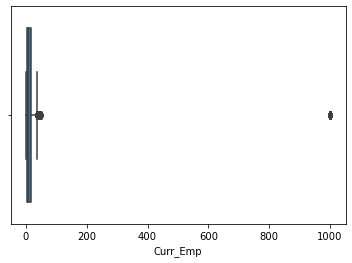

In [86]:
sns.boxplot(df.Curr_Emp)
plt.show()

In [87]:
res=df[df.Curr_Emp>25]
res

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,MONTHS_LAST_PHONE_CHANGE,AGE,Curr_Emp
8,100011,0,Cash loans,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,Unknown,2,2,0,0,XNA,0,55,1000.665753
11,100015,0,Cash loans,N,Y,0,38419.155,148365.0,10678.5,135000.0,...,0,Unknown,2,2,0,0,XNA,7,56,1000.665753
23,100027,0,Cash loans,N,Y,0,83250.000,239850.0,23850.0,225000.0,...,0,Unknown,2,3,0,0,XNA,2,68,1000.665753
38,100045,0,Cash loans,N,Y,0,99000.000,247275.0,17338.5,225000.0,...,0,Unknown,2,2,0,0,XNA,0,66,1000.665753
43,100050,0,Cash loans,N,Y,0,108000.000,746280.0,42970.5,675000.0,...,0,Unknown,1,2,0,0,XNA,1,65,1000.665753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,N,Y,0,202500.000,703728.0,29943.0,607500.0,...,0,Unknown,1,2,0,0,XNA,5,61,1000.665753
307483,456227,0,Cash loans,N,Y,0,99000.000,247275.0,16479.0,225000.0,...,0,Unknown,1,2,0,0,XNA,5,68,1000.665753
307487,456231,0,Cash loans,N,Y,0,117000.000,1071909.0,31473.0,936000.0,...,0,Unknown,2,2,0,0,XNA,2,63,1000.665753
307505,456249,0,Cash loans,N,Y,0,112500.000,225000.0,22050.0,225000.0,...,0,Unknown,1,2,0,0,XNA,0,67,1000.665753


Since a large datapoints has this reporting error, it is better to drop the column for avoiding False analysis

In [88]:
df.drop("Curr_Emp",axis=1,inplace=True)

In [89]:
df.shape

(307511, 25)

##### Checking the dataset for other discrepancies & datatypes

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307511 non-null  float64
 9   AMT_GOODS_PRICE             307511 non-null  float64
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

###### handling "FLAG_OWN_CAR" 

In [91]:
df.FLAG_OWN_CAR.describe()

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object

In [92]:
df.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

##### handling "FLAG_OWN_REALTY"

In [93]:
df.FLAG_OWN_REALTY.describe()

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object

In [94]:
df.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

#### FLAG_CONT_MOBILE

In [337]:
df.FLAG_CONT_MOBILE.value_counts()

1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [342]:
df.groupby('FLAG_CONT_MOBILE')["TARGET"].value_counts(normalize=True)

FLAG_CONT_MOBILE  TARGET
0                 0         0.921603
                  1         0.078397
1                 0         0.919267
                  1         0.080733
Name: TARGET, dtype: float64

There doesn't seem to be any relationship between not providing the contact number and having difficulty in paying the loan. Hence we can drop the column

In [344]:
df.drop("FLAG_CONT_MOBILE",axis=1,inplace=True)

#### FLAG_MOBIL

In [143]:
df.FLAG_MOBIL.value_counts(normalize=True)

1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64

In [146]:
df.groupby('FLAG_MOBIL')["TARGET"].value_counts(normalize=True)

FLAG_MOBIL  TARGET
0           0         1.000000
1           0         0.919271
            1         0.080729
Name: TARGET, dtype: float64

There doesn't seem to be any relationship between not providing the contact number and having difficulty in paying the loan. Hence we can drop the column 

In [147]:
df.drop("FLAG_MOBIL",axis=1,inplace=True)

#### FLAG_EMAIL

In [149]:
df.FLAG_EMAIL.value_counts(normalize=True)

0    0.94328
1    0.05672
Name: FLAG_EMAIL, dtype: float64

In [150]:
df.groupby('FLAG_EMAIL')["TARGET"].value_counts(normalize=True)

FLAG_EMAIL  TARGET
0           0         0.919154
            1         0.080846
1           0         0.921225
            1         0.078775
Name: TARGET, dtype: float64

Only 5% sample has provided the email address and therefore it will be difficult to use this for any useful analysis. 

In [151]:
# Dropping the column
df.drop("FLAG_EMAIL",axis=1,inplace=True)

In [152]:
df.shape

(307511, 25)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   FLAG_OWN_CAR                307511 non-null  object  
 4   FLAG_OWN_REALTY             307511 non-null  object  
 5   CNT_CHILDREN                307511 non-null  object  
 6   AMT_INCOME_TOTAL            307511 non-null  float64 
 7   AMT_CREDIT                  307511 non-null  float64 
 8   AMT_ANNUITY                 307511 non-null  float64 
 9   AMT_GOODS_PRICE             307511 non-null  float64 
 10  NAME_INCOME_TYPE            307511 non-null  object  
 11  NAME_EDUCATION_TYPE         307511 non-null  object  
 12  NAME_FAMILY_STATUS          307511 non-null  object  
 13 

##### The datatypes & dataset are ready for further exploration

# Handling Outliers

#### CNT_CHILDREN

In [95]:
df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [96]:
df.CNT_CHILDREN.unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

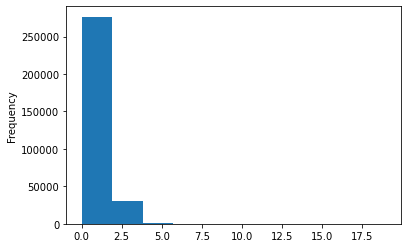

In [97]:
df.CNT_CHILDREN.plot.hist()
plt.show()

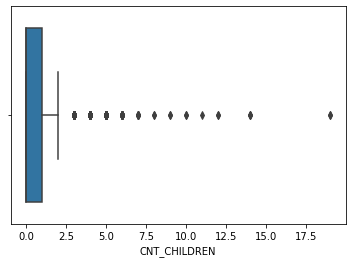

In [98]:
sns.boxplot(df.CNT_CHILDREN)
plt.show()

Majorly the count of number of children is between 0 and 2.5, some values are going upto a large value of 19.
So grouping the count above 3 into one category.

###### Grouping the value

In [99]:
df["CNT_CHILDREN"]=df["CNT_CHILDREN"].apply(lambda x: "<3" if x>3 else x)

In [100]:
df["CNT_CHILDREN"].unique()

array([0, 1, 2, 3, '<3'], dtype=object)

In [101]:
df["CNT_CHILDREN"].value_counts(normalize=True)

0     0.700368
1     0.198754
2     0.086986
3     0.012087
<3    0.001805
Name: CNT_CHILDREN, dtype: float64

The data points with children above 3 is about 1.8%, So grouping them is a considerable approach for further analysis

#### AMT_INCOME_TOTAL column

In [102]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

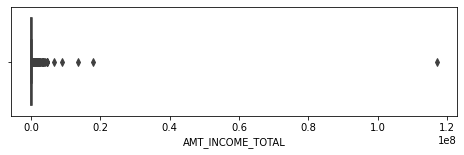

In [103]:
plt.figure(figsize=[8,2])
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

In [104]:
# IQR 
df.AMT_INCOME_TOTAL.quantile(0.75)-df.AMT_INCOME_TOTAL.quantile(0.25)

90000.0

In [105]:
# quantile values for 50,75,95 and 99 percentiles
df.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.95,0.99])

0.50    147150.0
0.75    202500.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [106]:
df.AMT_INCOME_TOTAL.max()

117000000.0

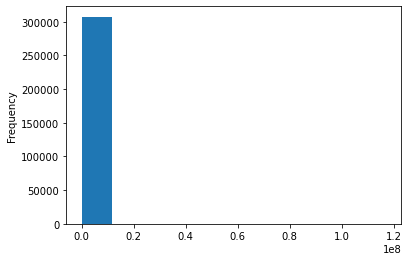

In [107]:
df.AMT_INCOME_TOTAL.plot.hist()
plt.show()

In [108]:
df[(df.AMT_INCOME_TOTAL>df.AMT_INCOME_TOTAL.quantile(0.99))]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,MONTHS_LAST_PHONE_CHANGE,AGE
51,100059,0,Cash loans,Y,Y,1,540000.0,675000.0,34596.0,675000.0,...,1,0,Managers,3,2,0,0,Services,4,51
59,100070,0,Cash loans,Y,Y,0,540000.0,1227901.5,46899.0,1129500.0,...,1,0,Managers,1,1,0,0,Business Entity Type 3,4,56
319,100366,0,Revolving loans,Y,Y,0,765000.0,1350000.0,67500.0,1350000.0,...,1,0,Managers,1,2,0,1,Business Entity Type 3,0,32
332,100380,0,Cash loans,N,Y,0,630000.0,900000.0,57519.0,900000.0,...,1,0,High skill tech staff,2,1,0,0,Business Entity Type 3,0,41
391,100454,0,Revolving loans,Y,Y,3,607500.0,1350000.0,67500.0,1350000.0,...,1,0,Managers,5,1,0,0,Other,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306882,455551,0,Cash loans,Y,Y,0,517500.0,2250000.0,59485.5,2250000.0,...,1,0,Managers,2,2,0,0,Industry: type 9,6,60
307002,455682,0,Cash loans,Y,N,0,546250.5,1800000.0,166572.0,1800000.0,...,1,0,Unknown,2,2,1,1,Insurance,4,31
307022,455706,0,Cash loans,N,Y,0,540000.0,625536.0,38398.5,540000.0,...,1,0,Managers,2,1,0,0,Self-employed,5,31
307484,456228,0,Cash loans,Y,N,0,540000.0,545040.0,35617.5,450000.0,...,1,1,Managers,2,1,0,0,Business Entity Type 3,4,35


There is a huge difference between the 99 percentile value and the maximum value, hence it suggests there are some data point with exceptionally high income and are looking for credit approval, in this binning the income values creating a new column "INCOME" with bins (>=100000,100000-250000,250000-500000,500000-1000000,1000000-2000000,2000000& above)

In [426]:
#Capping the values to 2000000 
df["AMT_INCOME_TOTAL"]=df.AMT_INCOME_TOTAL.apply(lambda x: 2000000 if x>=2000000 else x)
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.682052e+05
std      9.697456e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      2.000000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [109]:
df["Income"]=pd.cut(df["AMT_INCOME_TOTAL"], bins=[0,100000,250000,500000,1000000,2000000,999999999999], labels=['<=1','1-2.5','2.5-5.0','5-10','10-20','>20'])
df.Income.value_counts()

1-2.5      204035
<=1         63698
2.5-5.0     37076
5-10         2452
10-20         206
>20            44
Name: Income, dtype: int64

#### AMT_CREDIT

In [110]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

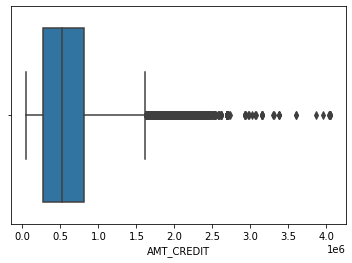

In [111]:
sns.boxplot(df.AMT_CREDIT)

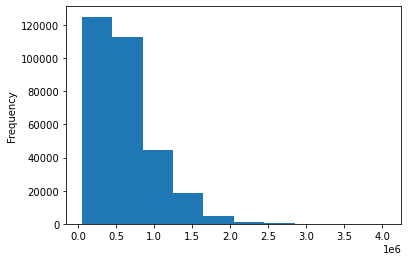

In [112]:
df.AMT_CREDIT.plot.hist()
plt.show()

In [113]:
df.AMT_CREDIT.quantile([0.5,0.75,0.95,0.99])

0.50     513531.0
0.75     808650.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [114]:
df[df.AMT_CREDIT>=df.AMT_CREDIT.quantile(0.99)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,MONTHS_LAST_PHONE_CHANGE,AGE,Income
189,100219,0,Cash loans,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,...,1,Core staff,3,1,0,0,Business Entity Type 3,3,31,2.5-5.0
337,100389,0,Cash loans,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,...,0,Core staff,2,2,0,0,Self-employed,7,39,1-2.5
341,100393,0,Cash loans,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,...,0,Core staff,4,2,0,0,Police,3,41,2.5-5.0
441,100508,0,Cash loans,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,...,1,Managers,2,1,0,0,Trade: type 3,1,50,2.5-5.0
485,100559,0,Cash loans,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,...,0,Core staff,2,2,0,0,Security Ministries,7,56,2.5-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,N,Y,0,112500.0,2032992.0,70794.0,1755000.0,...,0,Medicine staff,2,1,0,0,Medicine,5,55,1-2.5
307095,455785,0,Cash loans,Y,Y,0,135000.0,2013840.0,53253.0,1800000.0,...,0,Unknown,2,2,0,0,XNA,0,56,1-2.5
307165,455868,0,Cash loans,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,...,0,Accountants,2,1,0,0,Business Entity Type 3,2,29,2.5-5.0
307214,455922,0,Cash loans,Y,N,2,256500.0,2290743.0,60556.5,2047500.0,...,0,Managers,4,2,0,0,Business Entity Type 3,0,39,2.5-5.0


Binning the values of credit amount and creating another column "CREDIT" for effective comparision

In [115]:
df["Credit"]=pd.cut(df["AMT_CREDIT"], bins=[0,50000,100000,200000,500000,1000000,1500000,10000000],labels=["<=0.5","0.5-1","1-2","2-5","5-10","10-15",">15"])
df.Credit.value_counts()

2-5      113189
5-10     108193
10-15     39229
1-2       30140
>15       10756
0.5-1      5443
<=0.5       561
Name: Credit, dtype: int64

<AxesSubplot:>

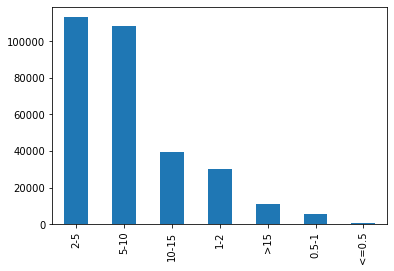

In [116]:
df.Credit.value_counts().plot.bar()
plt.show()

#### AMT_GOODS_PRICE

In [117]:
df.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

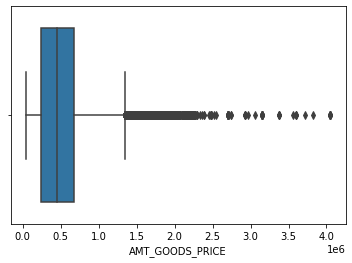

In [118]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

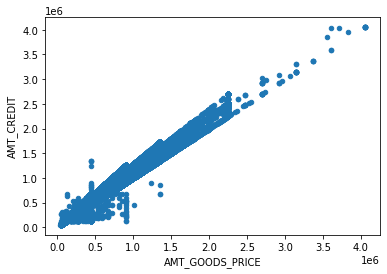

In [119]:
df.plot.scatter(x="AMT_GOODS_PRICE",y="AMT_CREDIT")
plt.show()

There seems to be a strong relation among Credit amount and Goods price, some outliers with high goods price and high credit amount, we will derive insights further ahead in the notebook

#### CNT_FAM_MEMBERS

In [120]:
df.CNT_FAM_MEMBERS.unique()

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 20, 15, 16, 11],
      dtype=int64)

In [121]:
df.CNT_FAM_MEMBERS.value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

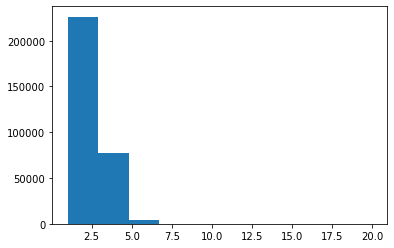

In [122]:
plt.hist(df.CNT_FAM_MEMBERS)
plt.show()

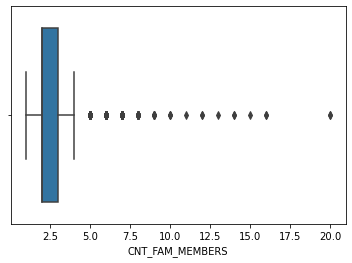

In [123]:
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

Maximum applicants have family members between 1 and 3, beyond 5 there is only 1% sample.

In [124]:
df.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

We will see the relation is further analysis and proceed accordingly. We can create a group of all the datapoints above 5 and treat them as a group for analysis further ahead

# Data Checking fot TARGET Variable

#### TARGET Column

In [125]:
df.TARGET.value_counts(normalize=True)

0    282686
1     24825
Name: TARGET, dtype: int64

As there is a large difference between the quantity of data points, Creating separate data sets for each Target Variable for balanced Analysis

### Creating Different datasets for defaulters(TARGET=1) and non defaulters(TARGET=0)

#### Defaulters dataset= df1

In [428]:
df1= df[df.TARGET==1]

In [127]:
df1.shape

(24825, 27)

In [128]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,MONTHS_LAST_PHONE_CHANGE,AGE,Income,Credit
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Laborers,1,2,0,0,Business Entity Type 3,3,26,1-2.5,2-5
26,100031,1,Cash loans,N,Y,0,112500.0,979992.0,27076.5,702000.0,...,Cooking staff,1,3,0,0,Business Entity Type 3,0,51,1-2.5,5-10
40,100047,1,Cash loans,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,Laborers,2,2,0,0,Business Entity Type 3,3,48,1-2.5,10-15
42,100049,1,Cash loans,N,N,0,135000.0,288873.0,16258.5,238500.0,...,Sales staff,2,3,0,0,Self-employed,4,37,1-2.5,2-5
81,100096,1,Cash loans,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,Unknown,2,2,0,0,XNA,0,68,<=1,2-5


#### Non Defaulters dataset=df0

In [429]:
df0=df[df.TARGET==0]

In [130]:
df0.shape

(282686, 27)

In [131]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,MONTHS_LAST_PHONE_CHANGE,AGE,Income,Credit
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Core staff,2,1,0,0,School,2,46,2.5-5.0,10-15
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Laborers,1,2,0,0,Government,2,52,<=1,1-2
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Laborers,2,2,0,0,Business Entity Type 3,2,52,1-2.5,2-5
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Core staff,1,2,0,0,Religion,3,55,1-2.5,5-10
5,100008,0,Cash loans,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,Laborers,2,2,0,0,Other,7,46,<=1,2-5


# UNIVARIATE ANALYSIS

## Categorical Ordered Univariate Analysis

### FLAG_OWN_CAR

In [132]:
df.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

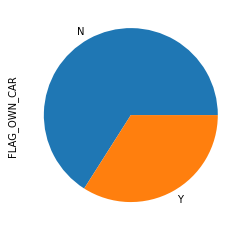

In [133]:
(df.FLAG_OWN_CAR.value_counts(normalize=True)*100).plot.pie()
plt.show()

In [134]:
df0.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.656824
Y    0.343176
Name: FLAG_OWN_CAR, dtype: float64

In [135]:
df1.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.694824
Y    0.305176
Name: FLAG_OWN_CAR, dtype: float64

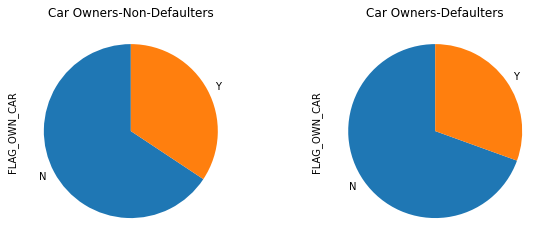

In [136]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.FLAG_OWN_CAR.value_counts().plot.pie(startangle=90)
plt.title("Car Owners-Non-Defaulters")
plt.subplot(1,2,2)
df1.FLAG_OWN_CAR.value_counts().plot.pie(startangle=90)
plt.title("Car Owners-Defaulters")
plt.show()

Majority of loan applicants donot own a car. In case of defaulters about 30% people own a car, to understand a correlation, we need to consider bivariate analysis

### FLAG_OWN_REALTY

In [142]:
df.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

In [ ]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.FLAG_OWN_REALTY.value_counts().plot.bar(color='Green')
plt.title("Property Owners-Non-Defaulters")
plt.subplot(1,2,2)
df1.FLAG_OWN_REALTY.value_counts().plot.bar(color='Red')
plt.title("Property Owners-Defaulters")
plt.show()

In [ ]:
df.groupby('FLAG_OWN_REALTY')["TARGET"].value_counts(normalize=True)

Amongst all the applicants, most of them own a house or flat. Individual distribution among the defaulters & non Defaulters is approximately the same.

### CNT_CHILDREN

In [ ]:
df.CNT_CHILDREN.unique()

In [690]:
df0.CNT_CHILDREN.value_counts(normalize=True)

0     0.703119
1     0.196915
2     0.086371
3     0.011882
<3    0.001712
Name: CNT_CHILDREN, dtype: float64

In [691]:
df1.CNT_CHILDREN.value_counts(normalize=True)

0     0.669043
1     0.219698
2     0.093978
3     0.014421
<3    0.002860
Name: CNT_CHILDREN, dtype: float64

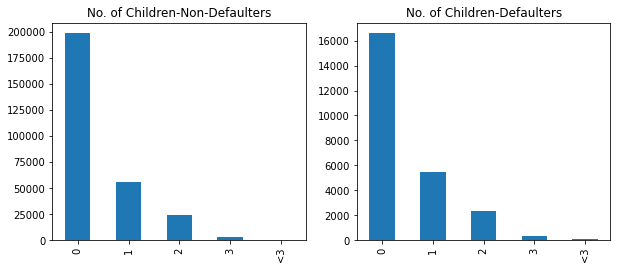

In [692]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.CNT_CHILDREN.value_counts().plot.bar()
plt.title("No. of Children-Non-Defaulters")
plt.subplot(1,2,2)
df1.CNT_CHILDREN.value_counts().plot.bar()
plt.title("No. of Children-Defaulters")
plt.show()

In [693]:
df.groupby('CNT_CHILDREN')['TARGET'].value_counts(normalize=True)*100

CNT_CHILDREN  TARGET
0             0         92.288191
              1          7.711809
1             0         91.076425
              1          8.923575
2             0         91.278179
              1          8.721821
3             0         90.368577
              1          9.631423
<3            0         87.207207
              1         12.792793
Name: TARGET, dtype: float64

The percentage of defaulters are higher for family with more than 3 children 

### NAME_EDUCATION_TYPE

In [214]:
df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

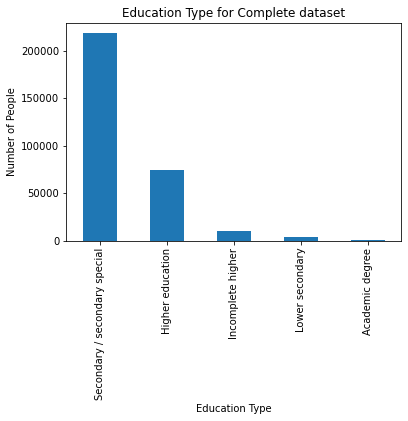

In [272]:
df.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.xlabel("Education Type")
plt.ylabel("Number of People")
plt.title("Education Type for Complete dataset")
plt.show()

The data has majority of people with Secondary and Higher education.

In [264]:
data=df.groupby("NAME_EDUCATION_TYPE")["TARGET"].value_counts(normalize=True)
data

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         0.981707
                               1         0.018293
Higher education               0         0.946449
                               1         0.053551
Incomplete higher              0         0.915150
                               1         0.084850
Lower secondary                0         0.890723
                               1         0.109277
Secondary / secondary special  0         0.910601
                               1         0.089399
Name: TARGET, dtype: float64

In [265]:
col=["Academic degree","Higher education","Incomplete higher","Lower secondary","Secondary / secondary special"]

In [266]:
defaulter=data[1::2]
non_defaulter=data[0::2]

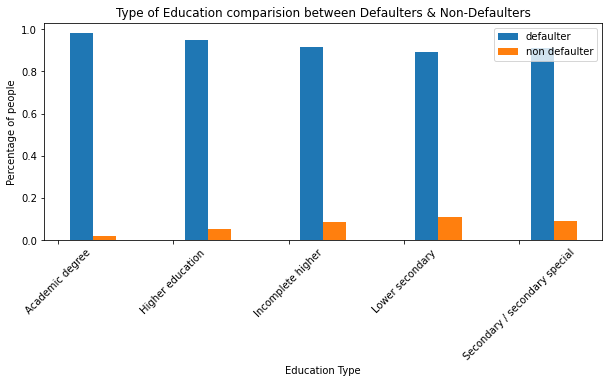

In [267]:
plt.figure(figsize=[10,4])
r=np.arange(5)
plt.bar(r +0.2,non_defaulter,width=0.2,label='defaulter')
plt.bar(r +0.2*2,defaulter,width=0.2,label='non defaulter')
plt.xticks(r,col,rotation=45)
plt.xlabel("Education Type")
plt.ylabel("Percentage of people")
plt.title("Type of Education comparision between Defaulters & Non-Defaulters")
plt.legend()
plt.show()

Major applicants have Secondary level of education.

People who either have not completed their higher or completed only secondary education have defaulted the most.

### NAME_FAMILY_STATUS

In [274]:
df.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

In [276]:
df0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64

In [277]:
df1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64

In [278]:
data=df.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts(normalize=True)
data

NAME_FAMILY_STATUS    TARGET
Civil marriage        0         0.900554
                      1         0.099446
Married               0         0.924401
                      1         0.075599
Separated             0         0.918058
                      1         0.081942
Single / not married  0         0.901923
                      1         0.098077
Unknown               0         1.000000
Widow                 0         0.941758
                      1         0.058242
Name: TARGET, dtype: float64

In [279]:
col=["Civil marriage","Married","Separated ","Single / not married","Unknown ","Widow"]

In [280]:
defaulter=[data[0],data[2],data[4],data[6],data[8],data[9]]
non_defaulter=[data[1],data[3],data[5],data[7],0,data[10]]

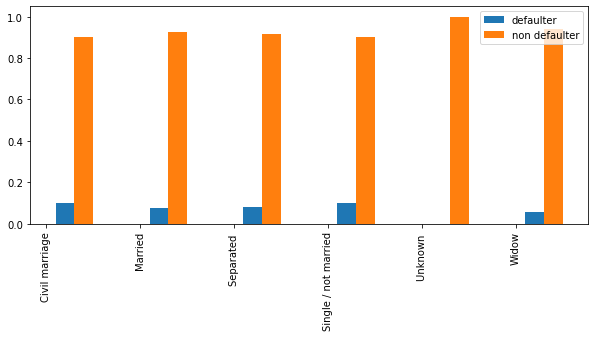

In [281]:
plt.figure(figsize=[10,4])
r=np.arange(6)
plt.bar(r +0.2,non_defaulter,width=0.2,label='defaulter')
plt.bar(r +0.2*2,defaulter,width=0.2,label='non defaulter')
plt.xticks(r,col,rotation='vertical')
plt.legend()
plt.show()

### Income & AMT_INCOME_TOTAL

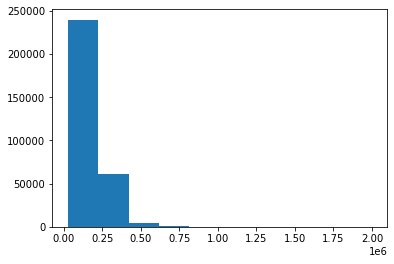

In [427]:
plt.hist(df.AMT_INCOME_TOTAL)
plt.show()

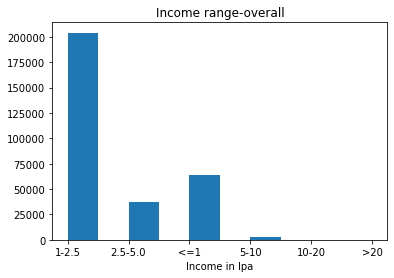

In [185]:
plt.hist(df.Income)
plt.xlabel("Income in lpa")
plt.title("Income range-overall")
plt.show()

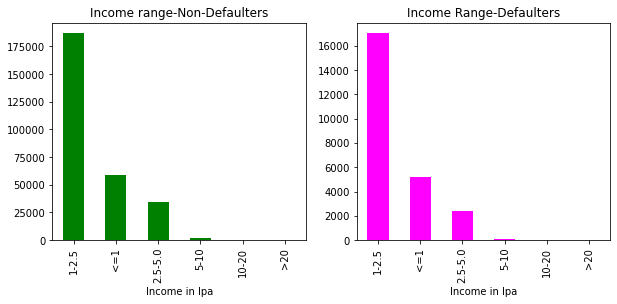

In [183]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.Income.value_counts().plot.bar(color='Green')
plt.title("Income range-Non-Defaulters")
plt.xlabel("Income in lpa")
plt.subplot(1,2,2)
df1.Income.value_counts().plot.bar(color="Magenta")
plt.title("Income Range-Defaulters")
plt.xlabel("Income in lpa")
plt.show()

### Inferences

* The majority of applicants are in the Income range of 1-2.5L, followed by less than 1L

* This analysis suggests us that, in terms of absolute numbers, most of the defaulters are having annual income less than 5L.

* Top Defaulters are in the income group of 1-2.5L**

### Credit 

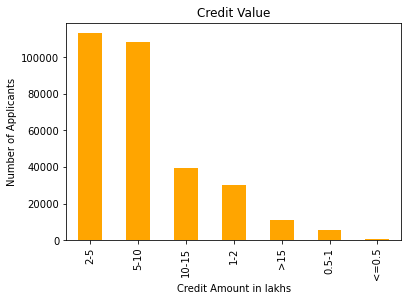

In [201]:
df.Credit.value_counts().plot.bar(color="Orange")
plt.xlabel("Credit Amount in lakhs")
plt.ylabel("Number of Applicants")
plt.title("Credit Value")
plt.show()

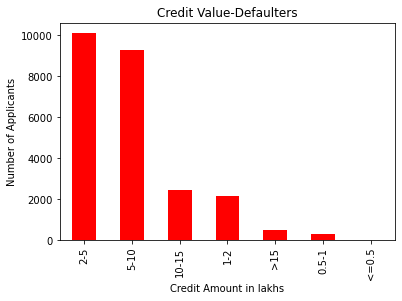

In [202]:
df1.Credit.value_counts().plot.bar(color="Red")
plt.xlabel("Credit Amount in lakhs")
plt.ylabel("Number of Applicants")
plt.title("Credit Value-Defaulters")
plt.show()

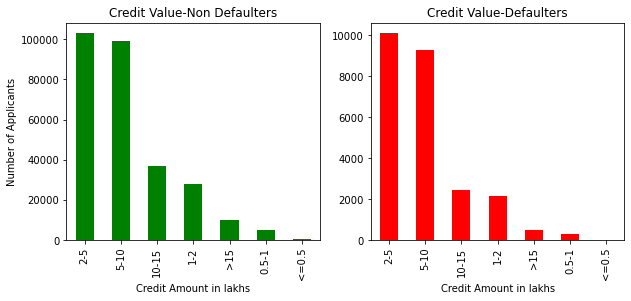

In [390]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.Credit.value_counts().plot.bar(color='Green')
plt.xlabel("Credit Amount in lakhs")
plt.ylabel("Number of Applicants")
plt.title("Credit Value-Non Defaulters")
plt.subplot(1,2,2)
df1.Credit.value_counts().plot.bar(color="Red")
plt.xlabel("Credit Amount in lakhs")
plt.title("Credit Value-Defaulters")
plt.show()

In [192]:
data=df.groupby("Income")['TARGET'].value_counts(normalize=True)
data

Income   TARGET
<=1      0         0.917972
         1         0.082028
1-2.5    0         0.916416
         1         0.083584
2.5-5.0  0         0.935268
         1         0.064732
5-10     0         0.945759
         1         0.054241
10-20    0         0.946602
         1         0.053398
>20      0         0.954545
         1         0.045455
Name: TARGET, dtype: float64

In [193]:
col=['<=1',"1-2.5","2.5-5","5-10",'10-20','>20']

In [194]:
defaulter=data[1::2]
non_defaulter=data[0::2]

In [195]:
defaulter

Income   TARGET
<=1      1         0.082028
1-2.5    1         0.083584
2.5-5.0  1         0.064732
5-10     1         0.054241
10-20    1         0.053398
>20      1         0.045455
Name: TARGET, dtype: float64

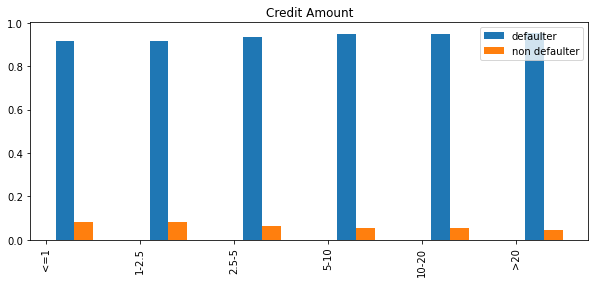

In [196]:
plt.figure(figsize=[10,4])
r=np.arange(6)
plt.bar(r +0.2,non_defaulter,width=0.2,label='defaulter')
plt.bar(r +0.2*2,defaulter,width=0.2,label='non defaulter')
plt.xticks(r,col,rotation='vertical')
plt.legend()
plt.title("Credit Amount")
plt.show()

In [ ]:
df1.Credit.value_counts(normalize=True).plot.bar()

#### Inferences

* More than 50% credit applications are between 2-15 lakhs

* In terms of credit value provided, the maximum defaulters lie in the range between 2-10 lakhs

### AGE

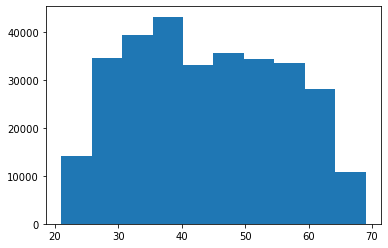

In [206]:
plt.hist(df.AGE)
plt.show()

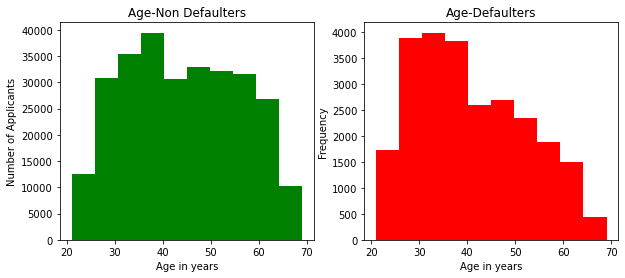

In [207]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.AGE.plot.hist(color='Green')
plt.xlabel("Age in years")
plt.ylabel("Number of Applicants")
plt.title("Age-Non Defaulters")
plt.subplot(1,2,2)
df1.AGE.plot.hist(color="Red")
plt.xlabel("Age in years")
plt.title("Age-Defaulters")
plt.show()

#### Inferences

* The applications for credit are for age between 20 to 70

* We can conclude that people aged between 25-40 contains the majority of defaulters.

### REGION_RATING_CLIENT

<AxesSubplot:ylabel='Regionwise composition'>

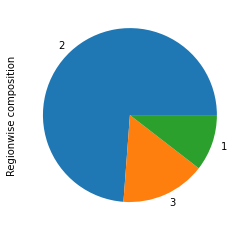

In [213]:
df.REGION_RATING_CLIENT.value_counts(normalize=True).plot.pie(label="Regionwise composition")

In [159]:
data=df.groupby('REGION_RATING_CLIENT')["TARGET"].value_counts(normalize=True)
data

REGION_RATING_CLIENT  TARGET
1                     0         0.951797
                      1         0.048203
2                     0         0.921109
                      1         0.078891
3                     0         0.888972
                      1         0.111028
Name: TARGET, dtype: float64

In [164]:
col=["Region 1","Region 2","Region 3"]
defaulter=data[1::2]
non_defaulter=data[0::2]


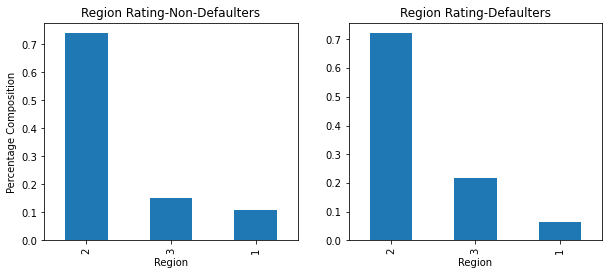

In [209]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.xlabel("Region")
plt.ylabel("Percentage Composition")
plt.title("Region Rating-Non-Defaulters")
plt.subplot(1,2,2)
df1.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.xlabel("Region")
plt.title("Region Rating-Defaulters")
plt.show()

#### Inference
A quick observation can be made through the above plot that the percentage of defaulters to the total number is comparatively higher in case of region 2.​

### CNT_FAM_MEMBERS

<AxesSubplot:ylabel='Frequency'>

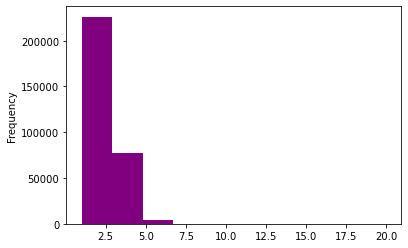

In [284]:
df.CNT_FAM_MEMBERS.plot.hist(color="Purple")

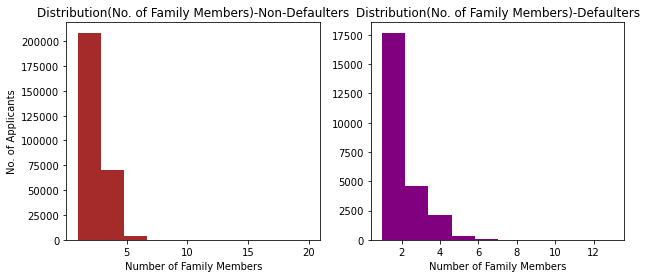

In [287]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.CNT_FAM_MEMBERS.plot.hist(color="brown")
plt.xlabel("Number of Family Members")
plt.ylabel("No. of Applicants")
plt.title("Distribution(No. of Family Members)-Non-Defaulters")
plt.subplot(1,2,2)
df1.CNT_FAM_MEMBERS.plot.hist(color="purple")
plt.xlabel("Number of Family Members")
plt.ylabel("")
plt.title("Distribution(No. of Family Members)-Defaulters")
plt.show()

#### Inference
* Major applicants are either single or have a family of 2
* The number of defaulters are high for people with only 1 or 2 members as compared to Families having members between 3 and 5 as per the univariate analysis above.​

## Categorical Unordered Univariate Analysis

### NAME_INCOME_TYPE

In [169]:
df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [170]:
df.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

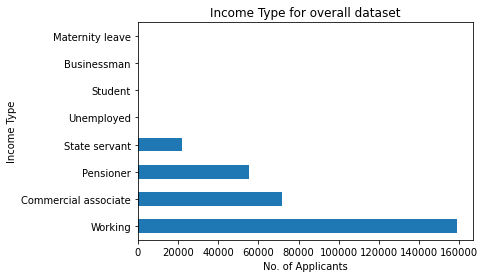

In [238]:
df.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.ylabel("Income Type")
plt.xlabel("No. of Applicants")
plt.title("Income Type for overall dataset")
plt.show()

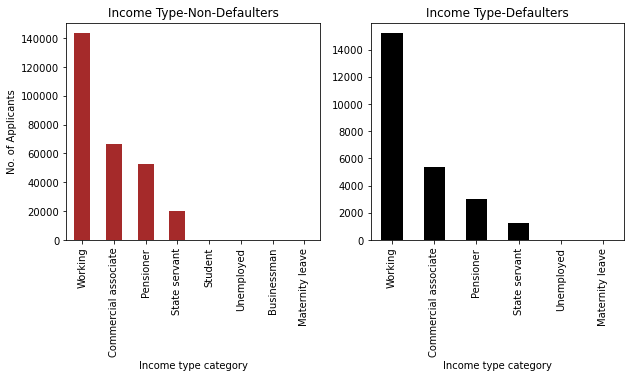

In [244]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.NAME_INCOME_TYPE.value_counts().plot.bar(color="Brown")
plt.title("Income Type-Non-Defaulters")
plt.xlabel("Income type category")
plt.ylabel("No. of Applicants")
plt.subplot(1,2,2)
df1.NAME_INCOME_TYPE.value_counts().plot.bar(color="Black")
plt.xlabel("Income type category")
plt.title("Income Type-Defaulters")
plt.show()

In [ ]:
data=df.groupby("NAME_INCOME_TYPE")["TARGET"].value_counts(normalize=True)
data

On comparing each category of Income type we can observe that Bussinessman are not defaulters in any case, while Maternity Leave have highest percentage of people with difficulty in paying the loans. Unemployed also have a 0.36 fraction with payment difficulties.

Overall comparision of df0 and df1 separately shows that Working people are highest in number, as the data contains Working people mostly. Top Three defaulters are Working, Commercial associate,Pensioner

#### Inferences
* Working professionals, Commercial Associate, Pensioners are the top 3 applicants for loan
* Other professionals have  quite less number.
* Working class has shown more defaults as compared to the other category of income sourced personals.
* The default pattern is proportional to the number of applicants​

#### NAME_HOUSING_TYPE

In [245]:
df.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

<AxesSubplot:>

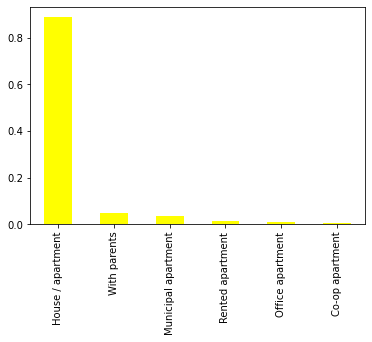

In [250]:
df.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color='Yellow')

In [255]:
d0=df0.NAME_HOUSING_TYPE.value_counts(normalize=True)*100
d0

House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64

In [256]:
d1=df1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100
d1

House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64

In [257]:
df.groupby("NAME_HOUSING_TYPE")["TARGET"].value_counts(normalize=True)

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0         0.920677
                     1         0.079323
House / apartment    0         0.922043
                     1         0.077957
Municipal apartment  0         0.914603
                     1         0.085397
Office apartment     0         0.934276
                     1         0.065724
Rented apartment     0         0.876869
                     1         0.123131
With parents         0         0.883019
                     1         0.116981
Name: TARGET, dtype: float64

In [258]:
col=["Co-op apartment","House / apartment","Municipal apartment","Office apartment","Rented apartment","With parents"]

In [259]:
defaulter=df.groupby("NAME_HOUSING_TYPE")["TARGET"].value_counts(normalize=True)[1::2]
non_defaulter=df.groupby("NAME_HOUSING_TYPE")["TARGET"].value_counts(normalize=True)[0::2]

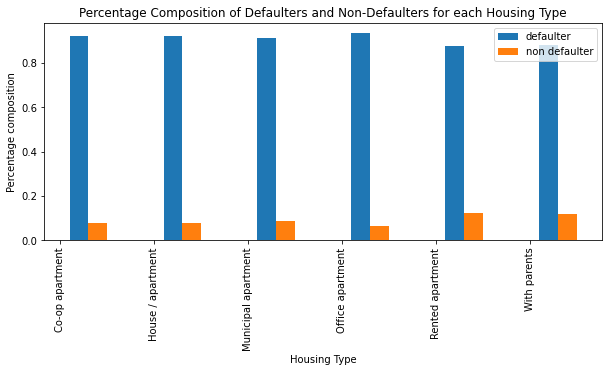

In [262]:
plt.figure(figsize=[10,4])
r=np.arange(6)
plt.bar(r +0.2,non_defaulter,width=0.2,label='defaulter')
plt.bar(r +0.2*2,defaulter,width=0.2,label='non defaulter')
plt.xticks(r,col,rotation='vertical')
plt.xlabel("Housing Type")
plt.ylabel("Percentage composition")
plt.title("Percentage Composition of Defaulters and Non-Defaulters for each Housing Type")
plt.legend()
plt.show()

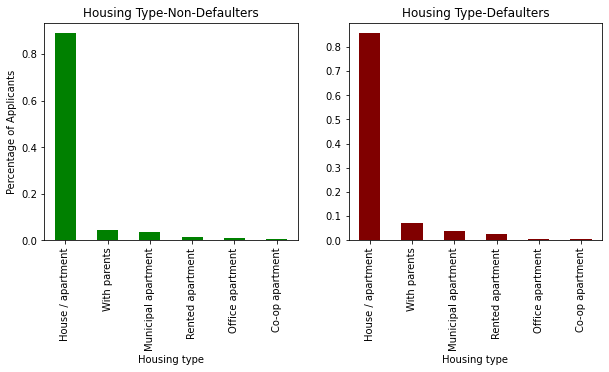

In [261]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color="Green")
plt.title("Housing Type-Non-Defaulters")
plt.xlabel("Housing type")
plt.ylabel("Percentage of Applicants")
plt.subplot(1,2,2)
df1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color="Maroon")
plt.xlabel("Housing type")
plt.title("Housing Type-Defaulters")
plt.show()

####  Inferences
Most of the people own a house/apartment apply for credit while People living in rented apartments have defaulted the most as compared to other housing facility residents.

#### OCCUPATION_TYPE

In [139]:
df.OCCUPATION_TYPE.value_counts(normalize=True)

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

#### ORGANIZATION_TYPE

In [140]:
df.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   FLAG_OWN_CAR                307511 non-null  object  
 4   FLAG_OWN_REALTY             307511 non-null  object  
 5   CNT_CHILDREN                307511 non-null  object  
 6   AMT_INCOME_TOTAL            307511 non-null  float64 
 7   AMT_CREDIT                  307511 non-null  float64 
 8   AMT_ANNUITY                 307511 non-null  float64 
 9   AMT_GOODS_PRICE             307511 non-null  float64 
 10  NAME_INCOME_TYPE            307511 non-null  object  
 11  NAME_EDUCATION_TYPE         307511 non-null  object  
 12  NAME_FAMILY_STATUS          307511 non-null  object  
 13 

# BIVARIATE & MULTIVARIATE ANALYSIS

### Numeric-Numeric Analysis

##### Income vs Credit

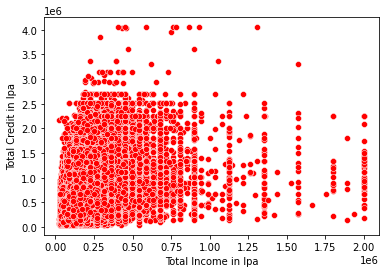

In [430]:
# Scatter plot
sns.scatterplot(data=df,x="AMT_INCOME_TOTAL",y="AMT_CREDIT", color="Red")
plt.xlabel("Total Income in lpa")
plt.ylabel("Total Credit in lpa")
plt.show()

In [298]:
df[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.15687
AMT_CREDIT,0.15687,1.00000


In [299]:
df1[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.000000,0.038131
AMT_CREDIT,0.038131,1.000000


In [300]:
df0[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.000000,0.342799
AMT_CREDIT,0.342799,1.000000


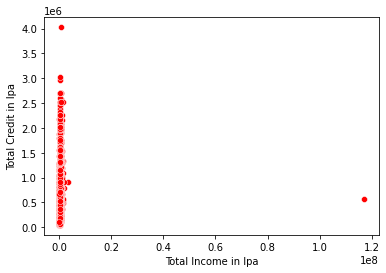

In [301]:
sns.scatterplot(data=df1,x="AMT_INCOME_TOTAL",y="AMT_CREDIT", color="Red")
plt.xlabel("Total Income in lpa")
plt.ylabel("Total Credit in lpa")
plt.show()

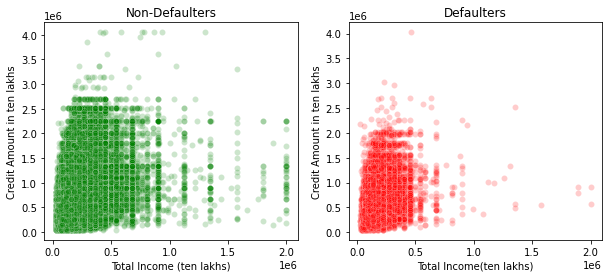

In [451]:
plt.figure(figsize=[10,4])
plt.title("Credit vs Income")
plt.subplot(1,2,1)
sns.scatterplot(data=df0,x="AMT_INCOME_TOTAL",y="AMT_CREDIT", color="Green",alpha=0.2)
plt.title("Non-Defaulters")
plt.xlabel("Total Income (ten lakhs)")
plt.ylabel("Credit Amount in ten lakhs")
plt.subplot(1,2,2)
sns.scatterplot(data=df1,x="AMT_INCOME_TOTAL",y="AMT_CREDIT", color="Red",alpha=0.2)
plt.xlabel("Total Income(ten lakhs)")
plt.ylabel("Credit Amount in ten lakhs")
plt.title("Defaulters")
plt.show()

##### This analysis suggests us that, in terms of absolute numbers, most of the defaulters are having annual income less than 5 lakhs and they have taken credit less than 20 lakhs​

#### Income Vs Annuity

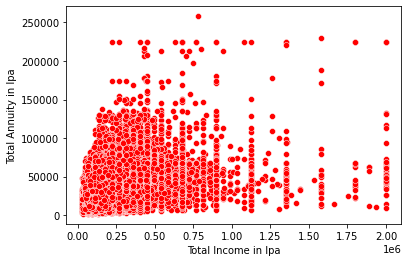

In [432]:
sns.scatterplot(data=df,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY", color="Red")
plt.xlabel("Total Income in lpa")
plt.ylabel("Total Annuity in lpa")
plt.show()

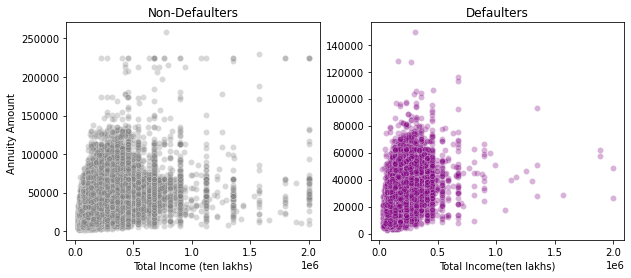

In [454]:
plt.figure(figsize=[10,4])
plt.title("Annuity vs Income")
plt.subplot(1,2,1)
sns.scatterplot(data=df0,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY", color="Grey",alpha=0.3)
plt.title("Non-Defaulters")
plt.xlabel("Total Income (ten lakhs)")
plt.ylabel("Annuity Amount ")
plt.subplot(1,2,2)
sns.scatterplot(data=df1,x="AMT_INCOME_TOTAL",y="AMT_ANNUITY", color="Purple",alpha=0.3)
plt.xlabel("Total Income(ten lakhs)")
plt.ylabel(" ")
plt.title("Defaulters")
plt.show()

##### With respect to annuity, within the same income brackets as above, customers having annuity less than 70000 have defaulted the most.​


#### Credit vs Annuity

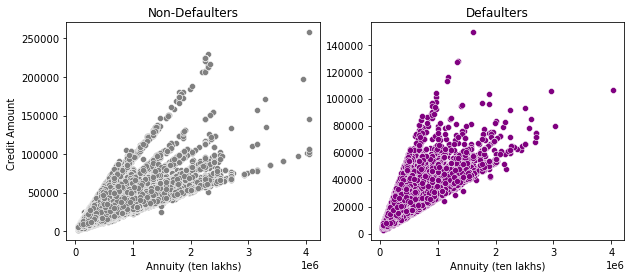

In [455]:
plt.figure(figsize=[10,4])
plt.title("Credit vs Annuity")
plt.subplot(1,2,1)
sns.scatterplot(data=df0,x="AMT_CREDIT",y="AMT_ANNUITY", color="Grey")
plt.title("Non-Defaulters")
plt.xlabel("Annuity (ten lakhs)")
plt.ylabel("Credit Amount ")
plt.subplot(1,2,2)
sns.scatterplot(data=df1,x="AMT_CREDIT",y="AMT_ANNUITY", color="Purple")
plt.xlabel("Annuity (ten lakhs)")
plt.ylabel(" ")
plt.title("Defaulters")
plt.show()

##### The graph shows a strong correlation between Annuity & Credit amount​

##### A slight variation in Credit amount & Annuity between Non defaulters & defaulters can be seen.​

##### Defaulters have a comparatively lesser credit amount(1.4 lakh) and high credit have defaulted more as that of Non Defaulters (2.5lakh)​

#### Credit vs Goods Price

In [ ]:
plt.figure(figsize=[10,4])
plt.title("Annuity vs Income")
plt.subplot(1,2,1)
sns.scatterplot(data=df0,x="AMT_CREDIT",y="AMT_GOODS_PRICE", color="Green")
plt.title("Non-Defaulters")
plt.xlabel("Goods Price (ten lakhs)")
plt.ylabel("Credit Amount (ten lakh) ")
plt.subplot(1,2,2)
sns.scatterplot(data=df1,x="AMT_CREDIT",y="AMT_GOODS_PRICE", color="Magenta")
plt.xlabel("Goods Price (ten lakhs)")
plt.ylabel(" ")
plt.title("Defaulters")
plt.show()

##### A very strong correlation exist between Credit and Goods Price considering the fact that loan is approved based on the value of Goods Price.​

#### Credit vs Income vs Annuity vs Goods price

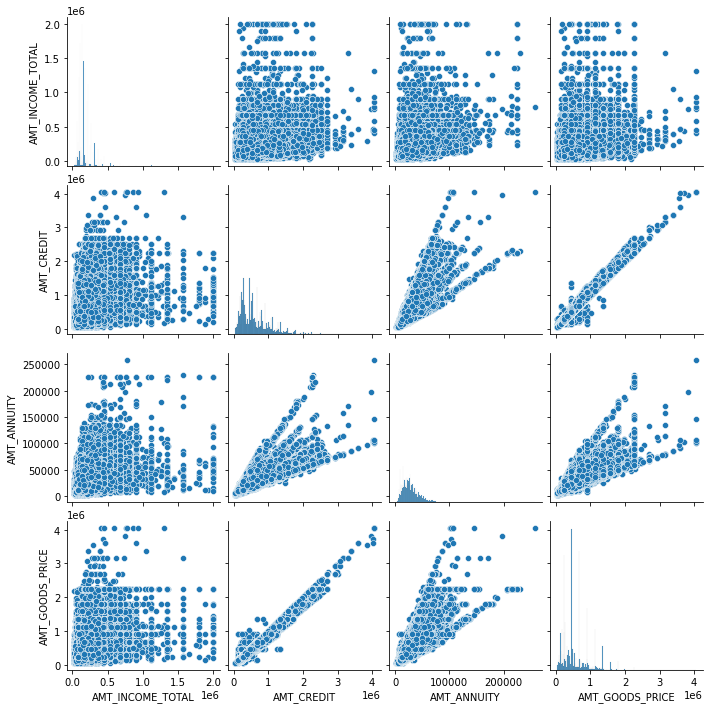

In [437]:
sns.pairplot(data=df, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

#### Inference

* The data point is spread across but densely populated for Income <5 lakh and Goods price below 20 lakhs​
* The overall graphs suggest that major defaulters have income below 5 lakhs and credit less than 20 lakhs
* Majority of defaulters are those with Annuity less than 70000.​
* For applicants with high income and high credit value, the number of defaulters are less but not zero.​

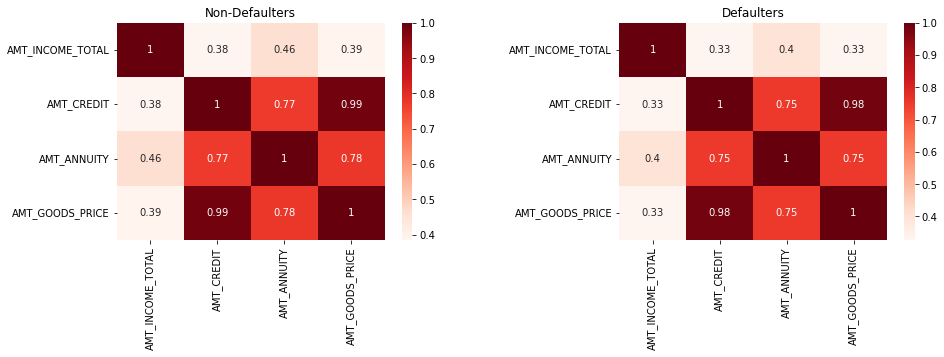

In [436]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.heatmap(df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True,cmap="Reds")
plt. title("Non-Defaulters")
plt.subplot(1,2,2)
sns.heatmap(df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True,cmap="Reds")
plt. title("Defaulters")
plt.subplots_adjust(wspace=0.5)
plt.show()

##### The Heatmap confirms our conclusions made in previous slide​
##### A very strong correlation value of 0.98 is seen between Credit and Goods Price​
##### A strong correlation 0.75 between Credit and Annuity & Goods Price and Annuity​

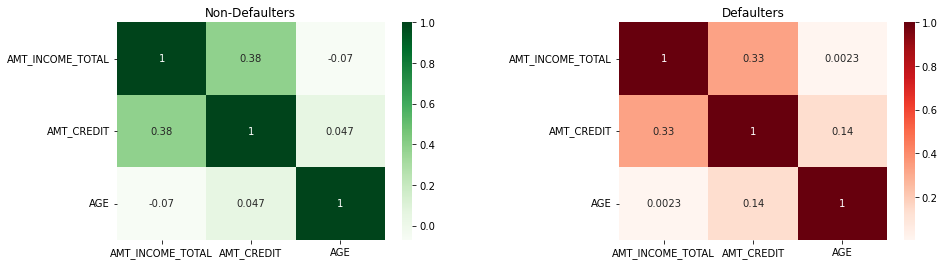

In [438]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.heatmap(df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AGE']].corr(),annot=True,cmap="Greens")
plt. title("Non-Defaulters")
plt.subplot(1,2,2)
sns.heatmap(df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AGE']].corr(),annot=True,cmap="Reds")
plt. title("Defaulters")
plt.subplots_adjust(wspace=0.5)
plt.show()

##### The matrix shows that there is not much correlation between Income and Age or Credit and age for both defaulter / non defaulters​
##### In this case we cannot see any direct or linear pattern, there may or may not be any indirect pattern.

#### Income vs Credit vs Age

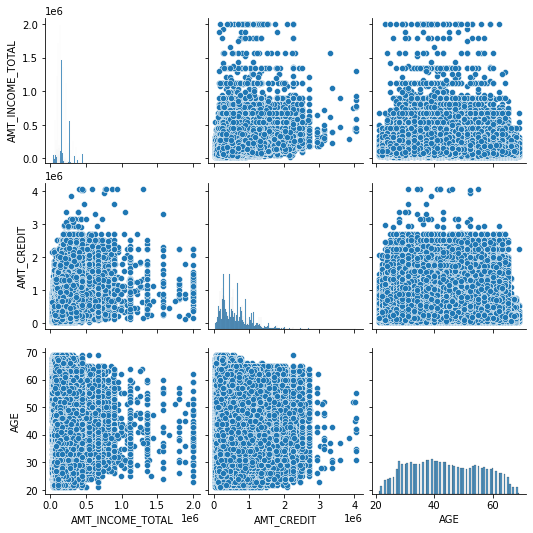

In [441]:
sns.pairplot(data=df, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AGE'])
plt.show()

## Numerical Categorical variable

#### AMT_INCOME_TOTAL vs NAME_CONTRACT_TYPE

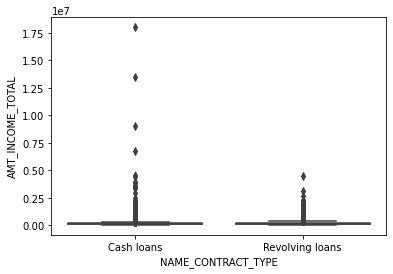

In [348]:
sns.boxplot(data=df0,x="NAME_CONTRACT_TYPE",y="AMT_INCOME_TOTAL")
plt.show()

df.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].aggregate(['mean','median']).plot.bar()
plt.xlabel("Contract Type")
plt.ylabel("Income")
plt.show()

In [353]:
df.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].aggregate(['mean','median'])

,mean,median
NAME_CONTRACT_TYPE,,
Cash loans,169069.513575,153000.0
Revolving loans,166217.017656,135000.0


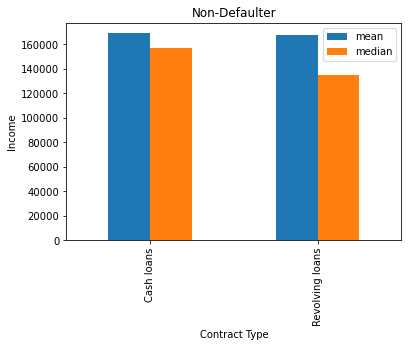

In [442]:
df0.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].aggregate(['mean','median']).plot.bar()
plt.xlabel("Contract Type")
plt.ylabel("Income")
plt.title("Non-Defaulter")
plt.show()


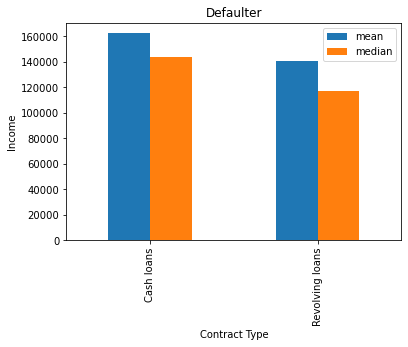

In [443]:
df1.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].aggregate(['mean','median']).plot.bar()
plt.xlabel("Contract Type")
plt.ylabel("Income")
plt.title("Defaulter")
plt.show()

#### Inference
* We can observe that the mean(1.7 lakh) & median(1.5 & 1.4 lakh respectively) for Cash loans is same in both cases ​
* But for Revolving loans the mean & median is comparatively less for defaulters(mean=1.4, median=1.2) , non-defaulters (mean=1.7, median=1.4)​
* Defaulters have Revolving loans of value between 1.7 & 1.1.​

### Education vs Income 

<Figure size 720x288 with 0 Axes>

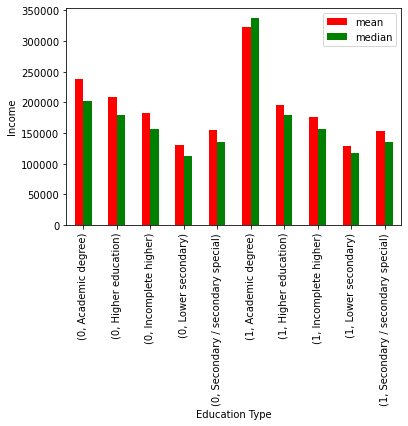

In [444]:
plt.figure(figsize=[10,4])
df.groupby(["TARGET","NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].aggregate(['mean','median']).plot.bar(color=["Red","Green"])
plt.xlabel("Education Type")
plt.ylabel("Income")
plt.show()

#### Inference
* For each class of Education, Academic degree holder are top defaulters with avg salary 2.4- 3.2 lakhs​
* The second highest defaulters are those with Higher education and avg salary 2 lakhs
* For applicants with education level below higher education avg salary between 1.75 & 2 lakhs ,face payment difficulties ​

#### Income vs Income Type

Text(0.5, 1.0, 'Income vs Income Type-Non-Defaulters')

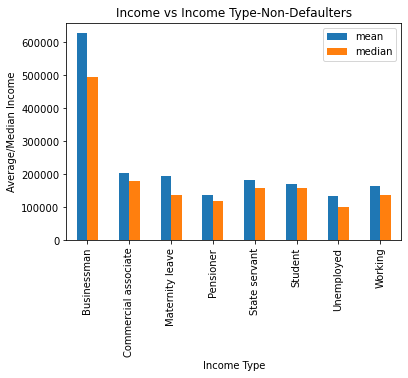

In [445]:
df0.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.xlabel("Income Type")
plt.ylabel("Average/Median Income")
plt.title("Income vs Income Type-Non-Defaulters")

Text(0.5, 1.0, 'Income vs Income Type-Defaulters')

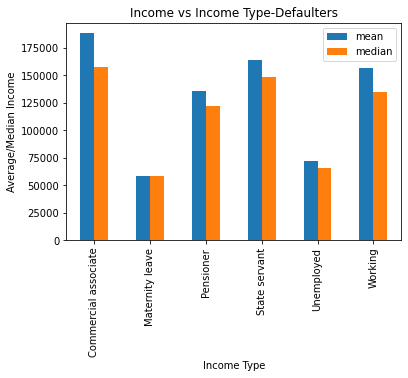

In [446]:
df1.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.xlabel("Income Type")
plt.ylabel("Average/Median Income")
plt.title("Income vs Income Type-Defaulters")

#### Inference
* Businessman have high avg Income and are not defaulters.​
* Commercial Associates with 2lakh avg earnings are top defaulters.​
* Working people & State servant with avg income near to 1.6 lakh are also major defaulters​

#### Credit vs Housing Type

Text(0.5, 1.0, 'Credit vs HouseType-Non Defaulters')

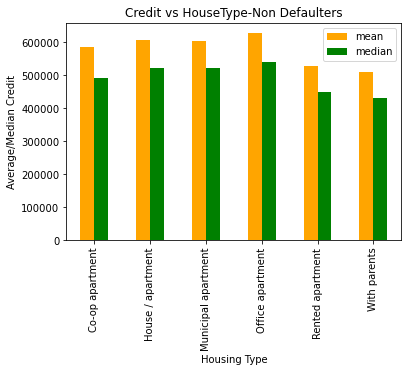

In [392]:
df0.groupby("NAME_HOUSING_TYPE")['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(color=["Orange","Green"])
plt.xlabel("Housing Type")
plt.ylabel("Average/Median Credit")
plt.title("Credit vs HouseType-Non Defaulters")

Text(0.5, 1.0, 'Credit vs HouseType-Defaulters')

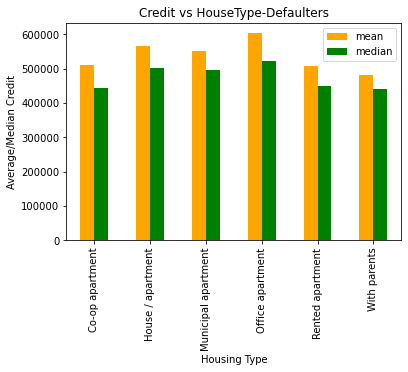

In [393]:
df1.groupby("NAME_HOUSING_TYPE")['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(color=["Orange","Green"])
plt.xlabel("Housing Type")
plt.ylabel("Average/Median Credit")
plt.title("Credit vs HouseType-Defaulters")

#### Inferences
* The defaulters are in a credit range of 4.5 to 6 lakhs​
* Top defaulters having credit value of 5-6 lakhs and occupies office apartments, House/apartment, Municipal Apartments

# Multivariate Analysis

#### Income vs Credit vs Target 

In [403]:
table1=pd.pivot_table(data=df,index='Income',columns='Credit',values='TARGET')
table1

Credit,<=0.5,0.5-1,1-2,2-5,5-10,10-15,>15
Income,,,,,,,
<=1,0.034946,0.050000,0.068254,0.091150,0.086135,0.066192,0.086093
1-2.5,0.054945,0.064674,0.075113,0.090203,0.088470,0.065434,0.048178
2.5-5.0,0.000000,0.086420,0.053812,0.074079,0.073835,0.054675,0.039480
5-10,0.000000,NaN,0.161290,0.094156,0.055623,0.047809,0.031955
10-20,NaN,NaN,0.000000,0.076923,0.073529,0.053571,0.019608
>20,NaN,NaN,0.000000,0.000000,0.117647,0.000000,0.000000


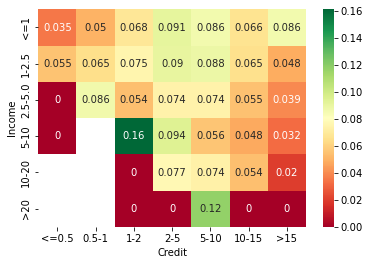

In [569]:
sns.heatmap(table1,annot=True,cmap='RdYlGn')
plt.show()

#### Inferences
* Customers having income less than 2.5L and have taken credit of more than 2L have defaulted the most
* Also, some customers who have an income of 5-10L and have taken credit of 1-5 have also defaulted but with deeper analysis, we come to know that the number is very low.​

#### iNCOME VS FAMILY STATUS VS TARGET

In [566]:
table2=pd.pivot_table(data=df,index='NAME_FAMILY_STATUS',columns='Income',values='TARGET')
table2

Income,<=1,1-2.5,2.5-5.0,5-10,10-20,>20
NAME_FAMILY_STATUS,,,,,,
Civil marriage,0.101758,0.102523,0.078258,0.071429,0.153846,0.250000
Married,0.078861,0.077871,0.060510,0.048214,0.061644,0.030303
Separated,0.075802,0.085654,0.074327,0.046784,0.000000,0.000000
Single / not married,0.102687,0.100914,0.074927,0.079890,0.000000,0.000000
Unknown,NaN,0.000000,0.000000,NaN,NaN,NaN
Widow,0.055145,0.060942,0.049822,0.023810,0.000000,NaN


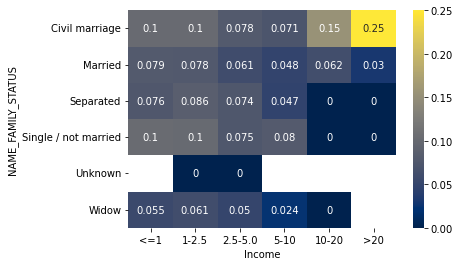

In [570]:
sns.heatmap(table2,annot=True,cmap='cividis')
plt.show()

In [695]:
df1.groupby("NAME_FAMILY_STATUS")['Income'].value_counts()

NAME_FAMILY_STATUS           
Civil marriage        1-2.5       2105
                      <=1          573
                      2.5-5.0      266
                      5-10          14
                      10-20          2
                      >20            1
Married               1-2.5      10035
                      <=1         3215
                      2.5-5.0     1509
                      5-10          81
                      10-20          9
                      >20            1
Separated             1-2.5       1141
                      <=1          286
                      2.5-5.0      185
                      5-10           8
                      10-20          0
                      >20            0
Single / not married  1-2.5       3169
                      <=1          875
                      2.5-5.0      384
                      5-10          29
                      10-20          0
                      >20            0
Widow                 1-2.5       

#### Inferences
* Singles having income less than 2.5L are contributing most to the number of defaulters.​
* Civil marriage customers having income less than 2.5L are also contributing to defaulters​
* One strange point observed is that civil marriage customers having income>20L have the highest target value of 0.25,​
After digging deeper into numbers, we can see that there is only one such customer who is acting as an outlier.​

#### HOUSING TYPE vs CREDIT vs TARGET

In [411]:
table3=pd.pivot_table(data=df,index='NAME_HOUSING_TYPE',columns='Credit',values='TARGET')
table3

Credit,<=0.5,0.5-1,1-2,2-5,5-10,10-15,>15
NAME_HOUSING_TYPE,,,,,,,
Co-op apartment,1.000000,0.000000,0.066116,0.095672,0.075472,0.072464,0.000000
House / apartment,0.040323,0.056191,0.068847,0.085742,0.083250,0.061039,0.044823
Municipal apartment,0.000000,0.048913,0.073034,0.098609,0.089369,0.067400,0.025000
Office apartment,0.000000,0.028571,0.056452,0.071429,0.067921,0.067989,0.027027
Rented apartment,0.000000,0.061224,0.106038,0.134328,0.129862,0.103448,0.077670
With parents,0.060606,0.072848,0.094894,0.128800,0.128154,0.084142,0.048611


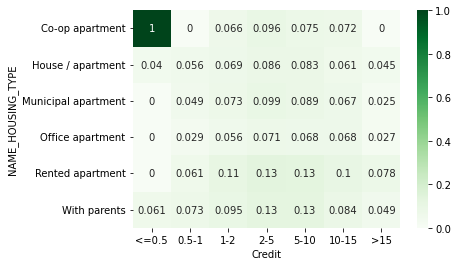

In [413]:
sns.heatmap(table3,annot=True,cmap='Greens')
plt.show()

#### Inferences
* All the customers having credit more than 1L and living in a rented apartment have defaulted the most​
* Also, customers living in an Co-op apartment and having credit less than 0.5L have also defaulted​

#### HOUSING TYPE vs INCOME vs TARGET

In [414]:
table4=pd.pivot_table(data=df,index='NAME_HOUSING_TYPE',columns='Income',values='TARGET')
table4

Income,<=1,1-2.5,2.5-5.0,5-10,10-20,>20
NAME_HOUSING_TYPE,,,,,,
Co-op apartment,0.076190,0.080977,0.070312,0.166667,NaN,NaN
House / apartment,0.078372,0.080854,0.063401,0.052186,0.053191,0.04878
Municipal apartment,0.091063,0.086535,0.070784,0.086207,0.000000,0.00000
Office apartment,0.068493,0.074618,0.029817,0.051282,0.000000,0.00000
Rented apartment,0.124867,0.129081,0.089317,0.062500,0.000000,NaN
With parents,0.131562,0.116151,0.091729,0.080000,0.125000,0.00000


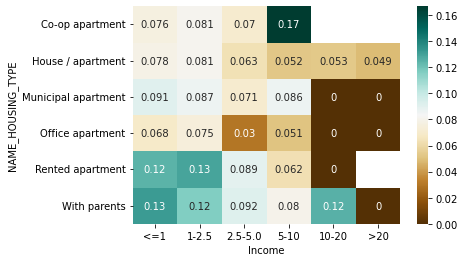

In [466]:
sns.heatmap(table4,annot=True,cmap='BrBG')
plt.show()

#### Inferences
* All the customers having income less than 5L and living in a rented apartment have defaulted the most​
* Also, customers living in an Co-op apartment and having income more than 5L ​

#### REGION RATING vs INCOME vs TARGET

In [417]:
table5=pd.pivot_table(data=df,index='REGION_RATING_CLIENT',columns='Income',values='TARGET')
table5

Income,<=1,1-2.5,2.5-5.0,5-10,10-20,>20
REGION_RATING_CLIENT,,,,,,
1,0.052063,0.052591,0.040357,0.037700,0.052632,0.071429
2,0.076029,0.080997,0.071616,0.069767,0.054545,0.038462
3,0.109482,0.115070,0.087497,0.048128,0.050000,0.000000


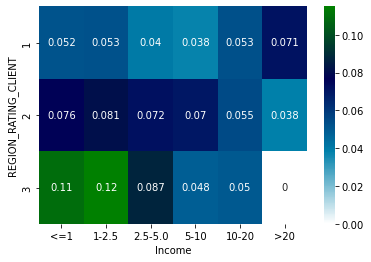

In [468]:
sns.heatmap(table5,annot=True,cmap='ocean_r')
plt.show()

#### Inferences
* All the customers having income less than 5L and living in region 3 have defaulted the most​
* Also, customers living in region 2 and having income less than 5L have also defaulted​

#### Region Rating vs Credit vs Target

In [470]:
table6=pd.pivot_table(data=df,index='REGION_RATING_CLIENT',columns='Credit',values='TARGET')
table6

Credit,<=0.5,0.5-1,1-2,2-5,5-10,10-15,>15
REGION_RATING_CLIENT,,,,,,,
1,0.037037,0.041026,0.048005,0.051532,0.055119,0.040905,0.023513
2,0.043197,0.055225,0.068445,0.086311,0.083706,0.062446,0.049453
3,0.028169,0.066742,0.093707,0.123622,0.117344,0.086080,0.062696


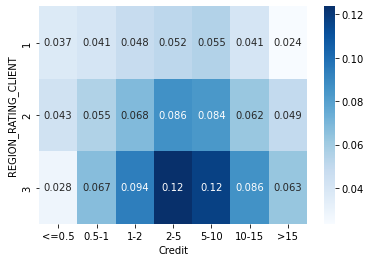

In [471]:
sns.heatmap(table6,annot=True,cmap='Blues')
plt.show()

#### Inferences
* All the customers living in region 3 and taken the credit b/w 1 and 10L have defaulted the most​
* Also, customers living in region 2 and having income  b/w 2 and 10L have also defaulted​

# Dealing with Previous Application Dataset

In [628]:
# Importing the data
inp1=pd.read_csv("previous_application.csv")

In [629]:
inp1.shape

(1670214, 37)

In [474]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning data

In [475]:
inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [630]:
# Dropping columns with no logical influence 
list1=["WEEKDAY_APPR_PROCESS_START","NAME_CONTRACT_TYPE","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","CNT_PAYMENT","NAME_YIELD_GROUP","PRODUCT_COMBINATION","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"]

In [631]:
inp1.drop(columns=list1,axis=1,inplace=True)

In [632]:
inp1.shape

(1670214, 18)

In [481]:
df.shape

(307511, 24)

In [633]:
## Dropping repeatitive columns & columns not needed for analysis further
drop_col=["AMT_GOODS_PRICE",'NAME_PRODUCT_TYPE','DAYS_DECISION']

In [634]:
inp1.drop(columns=drop_col,axis=1,inplace=True)

In [635]:
inp1.shape

(1670214, 15)

In [636]:
### Checking for same current applications and previous applications
inp1[(inp1.SK_ID_CURR)==(inp1.SK_ID_PREV)]

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,NAME_PORTFOLIO


In [637]:
#Dropping SK_ID_PREV
inp1.drop("SK_ID_PREV",axis=1,inplace=True)
inp1.shape

(1670214, 14)

In [519]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   SK_ID_CURR                1670214 non-null  int64  
 1   AMT_APPLICATION           1670214 non-null  float64
 2   AMT_DOWN_PAYMENT          774370 non-null   float64
 3   RATE_DOWN_PAYMENT         774370 non-null   float64
 4   RATE_INTEREST_PRIMARY     5951 non-null     float64
 5   RATE_INTEREST_PRIVILEGED  5951 non-null     float64
 6   NAME_CASH_LOAN_PURPOSE    1670214 non-null  object 
 7   NAME_CONTRACT_STATUS      1670214 non-null  object 
 8   NAME_PAYMENT_TYPE         1670214 non-null  object 
 9   CODE_REJECT_REASON        1670214 non-null  object 
 10  NAME_GOODS_CATEGORY       1670214 non-null  object 
 11  NAME_PORTFOLIO            1670214 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 152.9+ MB


### Using a full Inner joint to merge the datasets

In [638]:
df_merge=pd.merge(df,inp1,on="SK_ID_CURR",how="inner")

In [639]:
df_merge.shape

(1413701, 37)

In [520]:
df_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.000000,NaN,NaN,XAP,Approved,XNA,XAP,Vehicles,POS
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,XNA,Approved,XNA,XAP,XNA,Cash
2,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.000000,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Furniture,POS
3,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,6885.0,0.100061,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Consumer Electronics,POS
4,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,4860.0,0.212008,NaN,NaN,XAP,Approved,Cash through the bank,XAP,Mobile,POS


In [521]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   SK_ID_CURR                  1413701 non-null  int64   
 1   TARGET                      1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE          1413701 non-null  object  
 3   FLAG_OWN_CAR                1413701 non-null  object  
 4   FLAG_OWN_REALTY             1413701 non-null  object  
 5   CNT_CHILDREN                1413701 non-null  object  
 6   AMT_INCOME_TOTAL            1413701 non-null  float64 
 7   AMT_CREDIT                  1413701 non-null  float64 
 8   AMT_ANNUITY                 1413701 non-null  float64 
 9   AMT_GOODS_PRICE             1413701 non-null  float64 
 10  NAME_INCOME_TYPE            1413701 non-null  object  
 11  NAME_EDUCATION_TYPE         1413701 non-null  object  
 12  NAME_FAMILY_STATUS          1413701 non-nu

In [640]:
len(df_merge.SK_ID_CURR.unique())

291057

In [641]:
# dropping duplicate values and considering the last values as unique
df_merge.drop_duplicates(subset='SK_ID_CURR', keep='last',inplace=True)

In [642]:
df_merge.shape

(291057, 37)

In [643]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291057 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  291057 non-null  int64   
 1   TARGET                      291057 non-null  int64   
 2   NAME_CONTRACT_TYPE          291057 non-null  object  
 3   FLAG_OWN_CAR                291057 non-null  object  
 4   FLAG_OWN_REALTY             291057 non-null  object  
 5   CNT_CHILDREN                291057 non-null  object  
 6   AMT_INCOME_TOTAL            291057 non-null  float64 
 7   AMT_CREDIT_x                291057 non-null  float64 
 8   AMT_ANNUITY_x               291057 non-null  float64 
 9   AMT_GOODS_PRICE             291057 non-null  float64 
 10  NAME_INCOME_TYPE            291057 non-null  object  
 11  NAME_EDUCATION_TYPE         291057 non-null  object  
 12  NAME_FAMILY_STATUS          291057 non-null  object  
 13

In [527]:
df_merge.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REG_REGION_NOT_LIVE_REGION         0
REG_CITY_NOT_LIVE_CITY             0
ORGANIZATION_TYPE                  0
MONTHS_LAST_PHONE_CHANGE           0
AGE                                0
Income                             0
Credit                             0
AMT_APPLICATION                    0
AMT_DOWN_PAYMENT              116509
RATE_DOWN_PAYMENT             116509
R

In [528]:
## checking for Down payment against approved loans
d1=df_merge[df_merge.NAME_CONTRACT_STATUS=='Approved']

In [560]:
d1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REG_REGION_NOT_LIVE_REGION         0
REG_CITY_NOT_LIVE_CITY             0
ORGANIZATION_TYPE                  0
MONTHS_LAST_PHONE_CHANGE           0
AGE                                0
Income                             0
Credit                             0
AMT_APPLICATION                    0
AMT_DOWN_PAYMENT               58528
RATE_DOWN_PAYMENT              58528
R

In [531]:
## RATE_INTEREST_PRIMARY & RATE_INTEREST_PRIVILEGED are mostly missing the values therefore dropping them
df_merge.drop(["RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED"],axis=1,inplace=True)

##### AMT_DOWN_PAYMENT

In [534]:
df_merge.AMT_DOWN_PAYMENT.value_counts(normalize=True)*100

0.00        46.823223
4500.00      2.718450
9000.00      1.906639
13500.00     1.260398
22500.00     1.101130
              ...    
26518.50     0.000573
5398.38      0.000573
84060.00     0.000573
4862.25      0.000573
2197.80      0.000573
Name: AMT_DOWN_PAYMENT, Length: 13314, dtype: float64

In [535]:
df_merge.AMT_DOWN_PAYMENT.describe()

count    1.745480e+05
mean     7.056896e+03
std      1.987113e+04
min     -4.500000e-01
25%      0.000000e+00
50%      1.890000e+03
75%      8.482500e+03
max      2.135700e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

#### AMT_APPLICATION

In [536]:
df_merge.AMT_APPLICATION.value_counts()

0.00         48219
45000.00      7759
225000.00     6302
135000.00     6026
450000.00     5365
             ...  
34308.00         1
49198.50         1
166765.50        1
19701.45         1
472455.00        1
Name: AMT_APPLICATION, Length: 46836, dtype: int64

In [662]:
df_merge.AMT_CREDIT_y.astype('int64')
df_merge.AMT_CREDIT_x.astype('int64')

0           406597
3          1293502
4           135000
13          312682
19          513000
            ...   
1413687     254700
1413688     269550
1413690     677664
1413692     370107
1413700     675000
Name: AMT_CREDIT_x, Length: 291057, dtype: int64

In [663]:
## Difference between current Credit amount and previous application amount
df_merge["Credit_Diff"]=df_merge["AMT_CREDIT_x"]-df_merge["AMT_CREDIT_y"]

In [664]:
df_merge.Credit_Diff.describe()

count    2.910570e+05
mean     4.189041e+05
std      4.498762e+05
min     -3.499020e+06
25%      1.483380e+05
50%      3.610845e+05
75%      6.694560e+05
max      3.915000e+06
Name: Credit_Diff, dtype: float64

### NAME_CONTRACT_STATUS

In [507]:
df_merge.NAME_CONTRACT_STATUS.value_counts()

Approved        217090
Canceled         37284
Refused          32411
Unused offer      4272
Name: NAME_CONTRACT_STATUS, dtype: int64

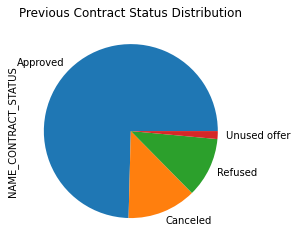

In [549]:
df_merge.NAME_CONTRACT_STATUS.value_counts().plot.pie()
plt.title("Previous Contract Status Distribution")
plt.show()

In [508]:
df_merge.groupby('NAME_CONTRACT_STATUS')["TARGET"].value_counts()

NAME_CONTRACT_STATUS  TARGET
Approved              0         200559
                      1          16531
Canceled              0          34106
                      1           3178
Refused               0          28619
                      1           3792
Unused offer          0           3928
                      1            344
Name: TARGET, dtype: int64

In [665]:
## Creating Non-defaulter data set
df_merge0=df_merge[df_merge.TARGET==0]

In [666]:
## Creating Defaulter dataset
df_merge1=df_merge[df_merge.TARGET==1]

In [553]:
df_merge0.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.750561
Canceled        0.127636
Refused         0.107102
Unused offer    0.014700
Name: NAME_CONTRACT_STATUS, dtype: float64

In [554]:
df_merge1.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.693269
Refused         0.159027
Canceled        0.133277
Unused offer    0.014427
Name: NAME_CONTRACT_STATUS, dtype: float64

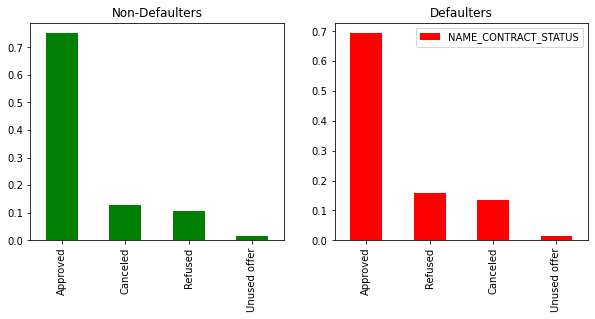

In [559]:
plt.figure(figsize=[10,4])
plt.title("Contract Status")
plt.subplot(1,2,1)
df_merge0.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar(color='Green')
plt.title("Non-Defaulters")
#plt.xlabel("Total Income (ten lakhs)")
#plt.ylabel("Credit Amount in ten lakhs")
plt.subplot(1,2,2)
df_merge1.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar(color='Red')
#plt.xlabel("Total Income(ten lakhs)")
#plt.ylabel("Credit Amount in ten lakhs")
plt.title("Defaulters")
plt.legend()
plt.show()

'Inference'- Around 11% of past refused applications are non-defaulters while 69% previously Approved applications are now having payment difficulties

#### Our Target is on Refused loans with Non-Defaulters and Approved loans with Defaulters

In [667]:
# Creating data frame for Refused & Non Defaulters
r_nd=df_merge0[df_merge.NAME_CONTRACT_STATUS=='Refused']

In [668]:
# # Creating data frame for Refused & Non Defaulters
a_d=df_merge0[df_merge.NAME_CONTRACT_STATUS=='Approved']

### Analysing Refused Non Defaulters

In [669]:
r_nd.shape

(28619, 38)

In [670]:
r_nd.Credit_Diff.describe()

count    2.861900e+04
mean     2.326352e+05
std      5.238834e+05
min     -3.474576e+06
25%      8.914500e+03
50%      2.250000e+05
75%      5.072872e+05
max      2.695500e+06
Name: Credit_Diff, dtype: float64

In [671]:
r_nd.Credit_Diff.sum()

6657787930.77

There are around 29 thousand customers who were refused loans previously, It has resulted into a loss of 763 Crores as a difference of credit between previous application and current application

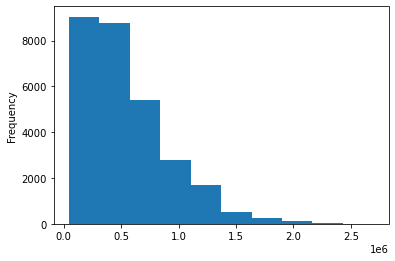

In [672]:
r_nd.AMT_CREDIT_x.plot.hist()
plt.show()

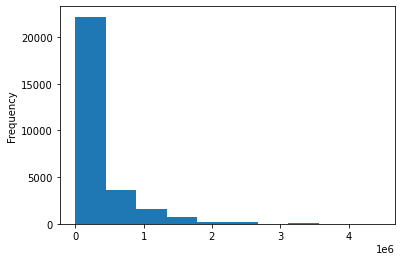

In [584]:
r_nd.AMT_APPLICATION.plot.hist()
plt.show()

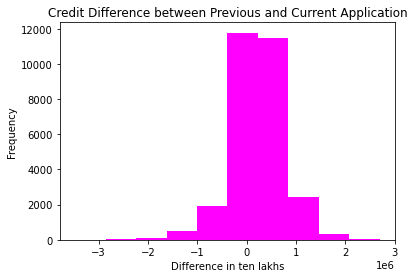

In [673]:
r_nd.Credit_Diff.plot.hist(color='Magenta')
plt.xlabel("Difference in ten lakhs")
plt.title("Credit Difference between Previous and Current Application")
plt.show()


In [587]:
r_nd.CODE_REJECT_REASON.value_counts()

HC        15396
LIMIT      6374
SCO        4473
SCOFR      1350
XNA         559
VERIF       387
SYSTEM       80
Name: CODE_REJECT_REASON, dtype: int64

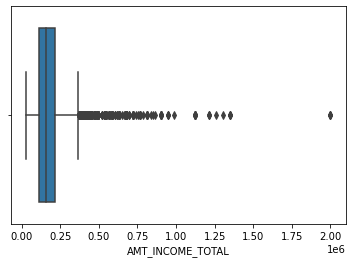

In [594]:
### Income vs Application amount
sns.boxplot(r_nd.AMT_INCOME_TOTAL)
plt.show()

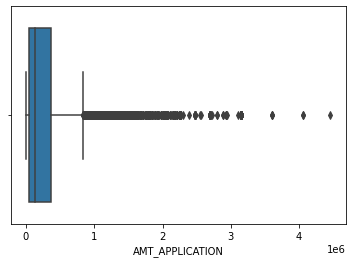

In [595]:
sns.boxplot(r_nd.AMT_APPLICATION)
plt.show()

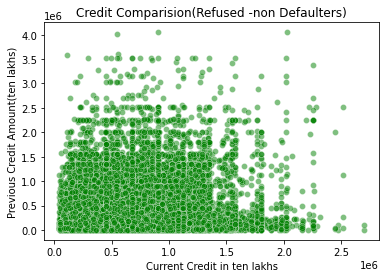

In [675]:
sns.scatterplot(data=r_nd,x="AMT_CREDIT_x",y="AMT_CREDIT_y",color='Green',alpha=0.5)
plt.xlabel("Current Credit in ten lakhs")
plt.ylabel("Previous Credit Amount(ten lakhs)")
plt.title("Credit Comparision(Refused -non Defaulters)")
plt.show()

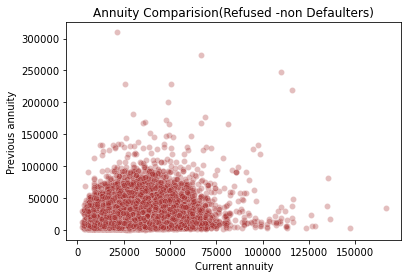

In [688]:
sns.scatterplot(data=r_nd,x="AMT_ANNUITY_x",y="AMT_ANNUITY_y",color='Brown',alpha=0.3)
plt.xlabel("Current annuity")
plt.ylabel("Previous annuity")
plt.title("Annuity Comparision(Refused -non Defaulters)")
plt.show()

In [609]:
r_nd.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 14743
XNA                                 10442
Repairs                              1170
Other                                 746
Urgent needs                          401
Buying a used car                     173
Building a house or an annex          159
Payments on other loans               108
Everyday expenses                     104
Medicine                               87
Education                              74
Journey                                63
Buying a new car                       59
Wedding / gift / holiday               53
Purchase of electronic equipment       50
Car repairs                            38
Buying a home                          36
Buying a holiday home / land           34
Furniture                              31
Business development                   24
Gasification / water supply            10
Buying a garage                         9
Hobby                                   3
Money for a third person          

In [610]:
r_nd.NAME_PORTFOLIO.value_counts()

Cash     11545
POS       8140
Cards     4896
XNA       4022
Cars        16
Name: NAME_PORTFOLIO, dtype: int64

In [611]:
r_nd.NAME_GOODS_CATEGORY.value_counts()

XNA                         20156
Mobile                       2642
Computers                    1727
Consumer Electronics         1134
Audio/Video                  1072
Furniture                     572
Construction Materials        316
Photo / Cinema Equipment      305
Clothing and Accessories      246
Auto Accessories               90
Jewelry                        72
Homewares                      57
Medical Supplies               41
Vehicles                       41
Gardening                      30
Sport and Leisure              25
Office Appliances              23
Medicine                       21
Other                          21
Tourism                        20
Direct Sales                    3
Education                       2
Additional Service              2
Fitness                         1
Name: NAME_GOODS_CATEGORY, dtype: int64

#### Inference 
* There are around 29 thousand customers who were refused loans previously, It has resulted into a loss of 665 Crores as a difference of credit between previous application and current application​​
* Applicants with lower current annuity are in the non-defaulters category​


### Approved-Defaulter data set

In [613]:
a_d.NAME_GOODS_CATEGORY.value_counts()

XNA                         58575
Mobile                      40266
Consumer Electronics        24848
Computers                   20294
Audio/Video                 19676
Furniture                   12091
Construction Materials       5628
Clothing and Accessories     5537
Photo / Cinema Equipment     4490
Auto Accessories             1424
Homewares                    1298
Jewelry                      1190
Medical Supplies             1115
Vehicles                      780
Sport and Leisure             651
Gardening                     644
Medicine                      465
Other                         462
Tourism                       435
Office Appliances             429
Direct Sales                   96
Fitness                        77
Education                      40
Additional Service             21
Weapon                         16
Insurance                      11
Name: NAME_GOODS_CATEGORY, dtype: int64

In [676]:
a_d.Credit_Diff.describe()

count    2.005590e+05
mean     4.237571e+05
std      4.386830e+05
min     -3.499020e+06
25%      1.412438e+05
50%      3.594780e+05
75%      6.724282e+05
max      3.915000e+06
Name: Credit_Diff, dtype: float64

In [677]:
a_d.Credit_Diff.sum()

84988303830.85503

In [678]:
a_d.shape

(200559, 38)

In [680]:
d2=a_d[a_d.AMT_CREDIT_x>a_d.AMT_CREDIT_y]

In [681]:
# % of defaulters with increased Credit limit as compared to previous applications
d2.shape[0]/a_d.shape[0]

0.9051949800308139

In [682]:
d2.Credit_Diff.sum()

90062369466.61502

In [683]:
d1=a_d[a_d.AMT_CREDIT_x<a_d.AMT_CREDIT_y]

In [684]:
d1.Credit_Diff.sum()

-5074065635.759999

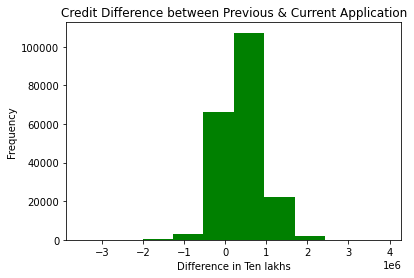

In [685]:
a_d.Credit_Diff.plot.hist(color='Green')
plt.xlabel("Difference in Ten lakhs")
plt.title("Credit Difference between Previous & Current Application")
plt.show()

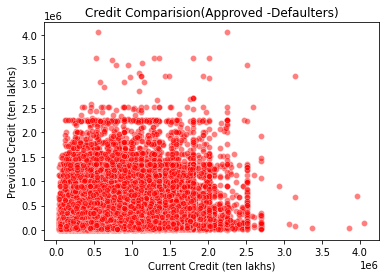

In [686]:
sns.scatterplot(data=a_d,x="AMT_CREDIT_x",y="AMT_CREDIT_y",color='Red',alpha=0.5)
plt.xlabel("Current Credit (ten lakhs)")
plt.ylabel("Previous Credit (ten lakhs)")
plt.title("Credit Comparision(Approved -Defaulters)")
plt.show()

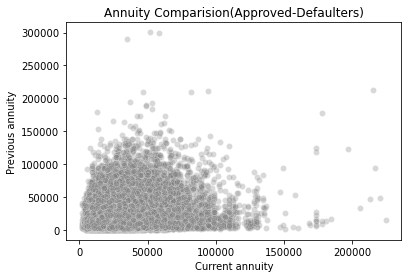

In [689]:
sns.scatterplot(data=a_d,x="AMT_ANNUITY_x",y="AMT_ANNUITY_y",color='Grey',alpha=0.3)
plt.xlabel("Current annuity")
plt.ylabel("Previous annuity")
plt.title("Annuity Comparision(Approved-Defaulters)")
plt.show()

#### Inferences
* There are around 2 lakh customers who were approved loans previously, Out of these around 92% has a current loan with increased loan amount.​
* On comparing the Credit difference for those 91% applicants, it has a difference of  9006 Crores​
* For those 8% with Previous loan amount less than Current credit amount, leads to a difference of 507 Cr​

### Final Conclusions can be found in the presentation
